# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

In [1]:
!pip install imblearn

## Importing libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading Data

In [2]:
df_train = pd.read_csv('Train.csv.csv')
df_test = pd.read_csv('Test.csv.csv')

In [3]:
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [4]:
df_train.shape

(20000, 41)

In [25]:
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


In [51]:
df_test.shape

(5000, 41)

### Creating a copy of the orginal data frame

In [5]:
d_train = df_train.copy()
d_test = df_test.copy()

### Data over view on Train data 

In [43]:
# checking first 5 rows
d_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [44]:
# checking last 5 rows
d_train.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071,-1.088,-0.796,-3.012,-2.288,2.807,0.481,0.105,-0.587,-2.899,8.868,1.717,1.358,-1.777,0.710,4.945,-3.100,-1.199,-1.085,-0.365,3.131,-3.948,-3.578,-8.139,-1.937,-1.328,-0.403,-1.735,9.996,6.955,-3.938,-8.274,5.745,0.589,-0.650,-3.043,2.216,0.609,0.178,2.928,1
19996,2.890,2.483,5.644,0.937,-1.381,0.412,-1.593,-5.762,2.150,0.272,-2.095,-1.526,0.072,-3.540,-2.762,-10.632,-0.495,1.720,3.872,-1.210,-8.222,2.121,-5.492,1.452,1.450,3.685,1.077,-0.384,-0.839,-0.748,-1.089,-4.159,1.181,-0.742,5.369,-0.693,-1.669,3.660,0.820,-1.987,0
19997,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
19998,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
19999,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0


In [45]:
# checking random rows 
d_train.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
9240,3.420,-0.339,3.677,-0.105,-2.828,-1.587,-0.553,-1.099,1.162,0.627,-0.650,1.627,3.381,-0.701,-2.266,-4.841,-1.939,-0.652,3.568,0.653,-6.718,2.066,-1.446,-1.372,1.154,0.982,2.831,-1.156,-1.543,-0.010,-0.686,-2.284,-1.471,0.862,4.832,0.381,-0.834,-1.422,0.468,-2.603,0
7864,1.776,1.878,0.989,0.321,1.124,-0.032,-0.469,-1.358,1.658,-0.308,-1.129,-2.521,1.729,0.180,-1.849,-2.060,-1.384,0.076,-1.808,-2.186,-2.264,0.651,0.091,0.515,-0.010,3.654,0.261,-1.553,-1.937,-1.742,2.275,2.647,0.897,-3.000,0.613,-0.146,-1.467,-0.850,-0.431,-0.477,0
8625,-6.654,-3.999,0.092,0.773,1.346,-3.259,-5.315,0.005,1.365,0.472,-8.197,2.685,8.816,1.914,-13.863,-7.712,0.364,7.559,-1.260,4.734,-8.844,5.264,7.346,4.647,-2.413,0.850,-4.709,-1.671,-6.825,1.225,-2.429,9.770,-0.624,-2.350,3.118,5.655,2.210,-5.560,3.267,-5.887,0
13617,-3.560,-0.812,2.012,4.544,0.173,-5.025,0.354,7.185,-4.985,1.599,-3.194,6.466,-2.555,-0.075,2.213,5.688,4.175,-3.300,6.748,3.274,0.905,-1.102,2.669,7.359,-1.422,-1.189,-5.872,1.904,-0.414,2.557,3.474,8.408,-1.299,3.997,4.820,1.224,-0.706,-2.796,-1.049,-2.518,0
15016,3.957,2.276,2.138,-1.854,-4.065,-0.800,2.854,2.204,-1.124,-2.797,7.665,7.488,3.092,-3.049,1.926,3.245,-3.090,-4.832,4.703,-2.322,-2.765,-1.024,-1.146,-5.844,-1.028,1.781,1.537,-2.234,6.627,5.156,-2.697,-7.487,1.432,1.832,4.171,-4.254,0.419,0.483,-0.966,0.932,1
15071,0.662,-0.800,-2.221,-7.504,0.047,3.265,0.116,0.026,-0.797,-2.919,5.248,2.670,2.571,-0.823,-1.670,1.811,-3.462,4.085,-5.949,-4.049,-0.150,0.714,2.367,-4.263,-1.331,0.106,0.866,-3.479,5.503,4.497,-0.721,-3.687,4.742,-5.169,-1.268,0.621,2.690,-0.236,0.162,5.691,0
11076,-0.306,2.178,7.401,-1.967,1.721,0.540,-1.037,-5.354,-0.667,3.495,-3.152,-1.500,0.854,-1.753,-1.726,-5.680,-4.849,1.482,1.023,-5.113,-3.965,-0.997,-7.049,1.990,0.863,6.665,3.518,-2.369,-3.234,-4.982,6.573,-0.850,2.020,-0.637,1.909,6.407,-2.541,3.812,3.675,-1.344,0
8020,0.741,0.634,3.348,-4.392,0.055,-0.535,-0.411,0.205,1.398,-3.581,-2.068,3.047,3.564,-1.014,-2.113,-1.775,1.064,3.118,-4.284,1.564,-2.561,-0.056,-1.095,-5.892,2.301,2.193,1.183,-3.113,0.429,-1.987,-0.042,-8.179,-2.991,-2.291,-2.846,4.216,3.481,-3.648,2.096,4.831,0
11021,-2.317,1.962,0.943,-4.714,4.288,1.845,-4.675,-4.163,2.859,-3.914,-3.949,-1.123,7.254,-1.574,-12.934,-9.320,-2.150,10.530,-9.132,-4.489,-9.198,4.471,4.493,2.467,-2.552,8.094,-4.827,-5.787,-1.195,1.912,1.206,5.719,6.840,-12.015,1.422,3.337,1.687,-1.944,1.632,2.271,0
2947,-4.912,5.827,-0.400,2.779,6.193,-2.026,-2.799,1.235,0.553,-4.835,-5.785,2.548,3.673,-2.434,-10.050,-3.800,3.751,5.497,-3.818,-3.207,-6.043,3.195,8.565,9.749,-4.893,9.743,-12.564,-2.857,-1.708,2.868,1.675,14.090,5.413,-9.297,2.655,-1.109,0.330,-1.290,-0.970,-0.171,0


In [33]:
# checking the no of columns and rows 
d_train.shape

(20000, 41)

### Observation 
* There are 20000 rows and  41 columns in the train data 

In [42]:
# checking the data types 
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

### Observation : 
* All the columns are of float data types and the target variable is of int data type 
* Column V1 & V2 has a few missing values

In [46]:
# checking for missing values 
d_train.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

### Observation : 
* Column V1 & V2 has 18 missing values

In [47]:
# checking for duplicate values 
d_train.duplicated().sum()

0

### Observation:
* There are no duplicate values in the data 

In [50]:
# stastistical summary of the data 
d_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


### Observation: 
* There a possible outliers in  some of the rows

### Data over view on Test data

In [53]:
# checking first 5 rows 
d_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


In [54]:
# checking last 5 rows 
d_test.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
4995,-5.120,1.635,1.251,4.036,3.291,-2.932,-1.329,1.754,-2.985,1.249,-6.878,3.715,-2.512,-1.395,-2.554,-2.197,4.772,2.403,3.792,0.487,-2.028,1.778,3.668,11.375,-1.977,2.252,-7.319,1.907,-3.734,-0.012,2.120,9.979,0.063,0.217,3.036,2.109,-0.557,1.939,0.513,-2.694,0
4996,-5.172,1.172,1.579,1.220,2.530,-0.669,-2.618,-2.001,0.634,-0.579,-3.671,0.460,3.321,-1.075,-7.113,-4.356,-0.001,3.698,-0.846,-0.222,-3.645,0.736,0.926,3.278,-2.277,4.458,-4.543,-1.348,-1.779,0.352,-0.214,4.424,2.604,-2.152,0.917,2.157,0.467,0.470,2.197,-2.377,0
4997,-1.114,-0.404,-1.765,-5.879,3.572,3.711,-2.483,-0.308,-0.922,-2.999,-0.112,-1.977,-1.623,-0.945,-2.735,-0.813,0.610,8.149,-9.199,-3.872,-0.296,1.468,2.884,2.792,-1.136,1.198,-4.342,-2.869,4.124,4.197,3.471,3.792,7.482,-10.061,-0.387,1.849,1.818,-1.246,-1.261,7.475,0
4998,-1.703,0.615,6.221,-0.104,0.956,-3.279,-1.634,-0.104,1.388,-1.066,-7.970,2.262,3.134,-0.486,-3.498,-4.562,3.136,2.536,-0.792,4.398,-4.073,-0.038,-2.371,-1.542,2.908,3.215,-0.169,-1.541,-4.724,-5.525,1.668,-4.100,-5.949,0.550,-1.574,6.824,2.139,-4.036,3.436,0.579,0
4999,-0.604,0.960,-0.721,8.230,-1.816,-2.276,-2.575,-1.041,4.130,-2.731,-3.292,-1.674,0.465,-1.646,-5.263,-7.988,6.480,0.226,4.963,6.752,-6.306,3.271,1.897,3.271,-0.637,-0.925,-6.759,2.990,-0.814,3.499,-8.435,2.370,-1.062,0.791,4.952,-7.441,-0.070,-0.918,-2.291,-5.363,0


In [56]:
# checking random rows 
d_test.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
954,-4.830,-1.880,-1.064,1.576,0.883,-1.977,-1.902,1.264,-2.018,1.417,-3.929,4.239,1.266,0.035,-5.097,-2.646,1.751,3.486,2.897,1.783,-3.253,3.132,5.257,7.062,-2.399,-1.104,-4.445,1.212,-2.819,2.379,-1.708,7.545,0.246,0.805,3.111,1.945,0.808,0.397,1.189,-3.771,0
4149,2.307,-1.137,7.197,-4.856,-3.238,1.630,-0.873,-6.400,-0.737,3.839,1.725,1.619,2.748,-2.586,-2.036,-7.984,-7.676,1.649,4.557,-3.922,-7.449,0.830,-8.099,-2.529,1.274,2.044,7.631,-2.286,0.277,-0.498,1.067,-8.125,2.359,2.035,5.497,4.724,-1.347,4.715,3.984,-2.199,0
4741,2.145,1.434,1.586,2.645,-0.922,-2.686,0.183,1.286,1.131,-0.960,-2.610,1.772,1.123,-0.453,-0.758,-2.235,2.487,-1.443,2.764,2.112,-3.620,1.609,1.331,1.009,0.902,1.084,-0.923,0.349,-2.353,-1.005,-0.930,0.539,-3.413,0.724,2.244,-1.285,-0.334,-1.922,-0.823,-1.640,0
432,-1.421,-0.219,4.649,2.576,1.395,-3.037,-2.676,1.381,0.721,-0.491,-7.715,-1.183,-0.176,0.063,-2.439,-3.281,4.576,1.988,-0.466,4.467,-3.310,0.182,-1.151,3.118,1.881,1.729,-3.684,-0.371,-3.303,-2.194,3.608,3.312,-2.210,-1.551,1.886,3.734,0.132,-5.292,0.250,-0.006,0
4401,-2.497,-1.888,4.956,-0.363,-1.658,-0.048,-0.325,-3.006,-2.573,4.947,-0.148,1.572,-0.835,-1.110,0.863,-2.273,-3.640,-0.852,6.209,-0.360,-0.958,-1.769,-6.881,0.671,0.419,-0.550,3.785,0.863,-0.587,-1.226,1.328,-3.619,0.360,5.952,2.679,4.480,-1.255,4.432,3.643,-3.689,0
557,-1.215,2.255,1.302,-1.356,3.039,-1.416,-0.789,3.386,-1.719,-2.720,-2.342,3.399,1.191,-1.117,-2.631,1.628,1.578,2.555,-3.189,-2.385,-2.119,0.653,4.117,4.057,-1.665,4.669,-5.623,-2.846,0.837,2.050,4.609,6.490,2.952,-5.796,1.790,1.768,0.627,-3.190,-0.925,3.214,0
4660,2.666,-0.033,2.032,-2.836,-1.635,1.001,0.147,-2.381,-0.428,1.063,1.558,1.543,0.889,-1.397,-0.458,-3.618,-3.137,1.016,1.821,-2.763,-3.913,1.612,-1.746,-0.488,0.458,0.610,3.386,-1.008,0.503,0.608,-0.058,-3.226,1.157,-0.183,2.968,0.803,-0.545,2.454,0.801,-0.129,0
4761,-0.281,-0.565,6.268,0.560,-1.263,-5.640,-0.795,2.759,0.974,-1.562,-9.024,6.538,3.533,-0.299,-2.437,-4.222,5.819,1.417,2.321,8.125,-5.432,1.394,-0.280,-2.265,4.167,0.206,0.334,-0.350,-5.635,-5.276,-0.939,-6.476,-10.705,3.538,-0.598,6.603,3.499,-6.103,3.135,0.119,0
99,1.615,-0.340,-0.203,0.683,-1.293,-1.365,1.280,0.581,-0.989,1.683,-1.584,3.045,-1.368,0.026,1.941,-1.353,1.475,-0.785,4.084,1.040,-0.950,2.029,1.423,2.163,1.154,-2.346,2.027,2.128,-2.921,-1.827,-1.528,-0.998,-4.439,3.506,0.690,0.370,-0.048,1.894,0.297,-1.596,1
697,-3.505,4.728,-0.610,1.865,2.486,0.697,0.924,-0.734,-1.715,-1.751,1.400,2.979,-2.290,-3.507,-0.242,0.493,1.567,0.090,1.951,-3.707,1.145,-0.933,0.654,4.524,-3.171,4.155,-5.683,0.644,2.989,2.360,-1.331,1.784,3.949,-0.514,0.110,-3.087,-0.103,6.254,-0.049,0.263,0


In [57]:
# checking shape of the data 
d_test.shape

(5000, 41)

### Observation:
* There are 5000 Rows and 41 columns

In [59]:
# checking the data types
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

### Observation:
 * All the columns are float data types and target variable is int data type

In [60]:
# checking for missing values 
d_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

### Observation:
* There 5 missing values in the V1 column and  6 missing values in the V2 column

In [61]:
# checking for duplicate values 
d_test.duplicated().sum()

0

### Observation: 
* There are no duplicate values 

In [62]:
# statistical summary of the data
d_test.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
V1,4995.000,-0.278,3.466,-12.382,-2.744,-0.765,1.831,13.504
V2,4994.000,0.398,3.140,-10.716,-1.649,0.427,2.444,14.079
V3,5000.000,2.552,3.327,-9.238,0.315,2.260,4.587,15.315
V4,5000.000,-0.049,3.414,-14.682,-2.293,-0.146,2.166,12.140
V5,5000.000,-0.080,2.111,-7.712,-1.615,-0.132,1.341,7.673
V6,5000.000,-1.042,2.005,-8.924,-2.369,-1.049,0.308,5.068
V7,5000.000,-0.908,1.769,-8.124,-2.054,-0.940,0.212,7.616
V8,5000.000,-0.575,3.332,-12.253,-2.642,-0.358,1.713,10.415
V9,5000.000,0.030,2.174,-6.785,-1.456,-0.080,1.450,8.851
V10,5000.000,0.019,2.145,-8.171,-1.353,0.166,1.511,6.599


### Observation:
* There are possible outliers in some of the rows

In [319]:
# lets check for unique values in the Target variable in the Train set 

d_train['Target'].value_counts()

0    18890
1     1110
Name: Target, dtype: int64

In [321]:
# lets check for unique values in the Target variable in the Test set 

d_test['Target'].value_counts()

0    4718
1     282
Name: Target, dtype: int64

### Observation: 
* As, we can observe the value of 0 which means 'No failure' is higher when compred to 1 which means 'failure'.
* It is quite evident that there is an imbalance in majority and minority class.

## EDA

### Univariate Analysis

### Plotting histograms and boxplots for all the variables

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Plotting all the features  of the Train data  set at one go

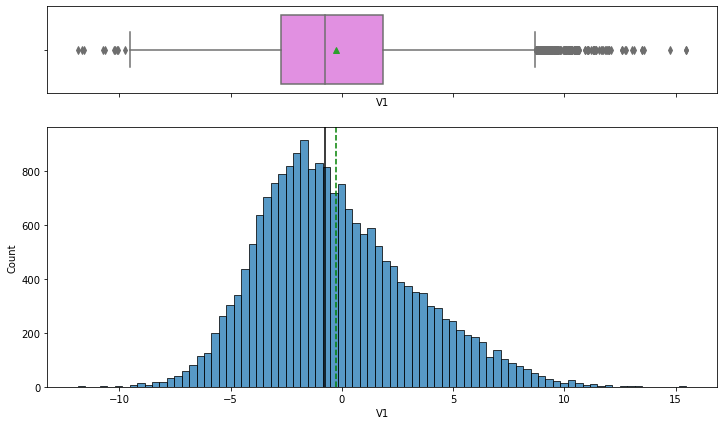

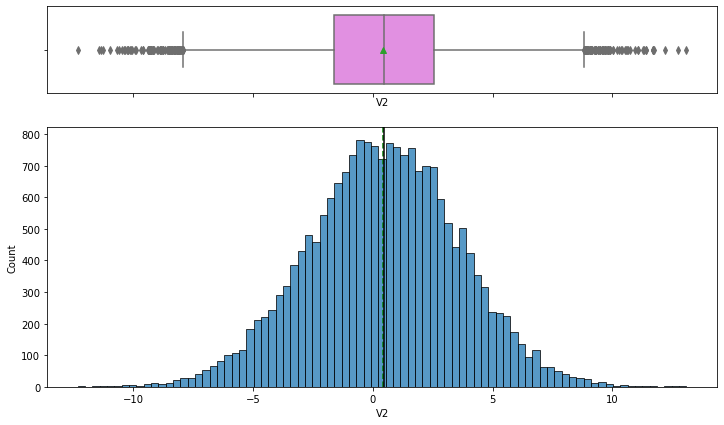

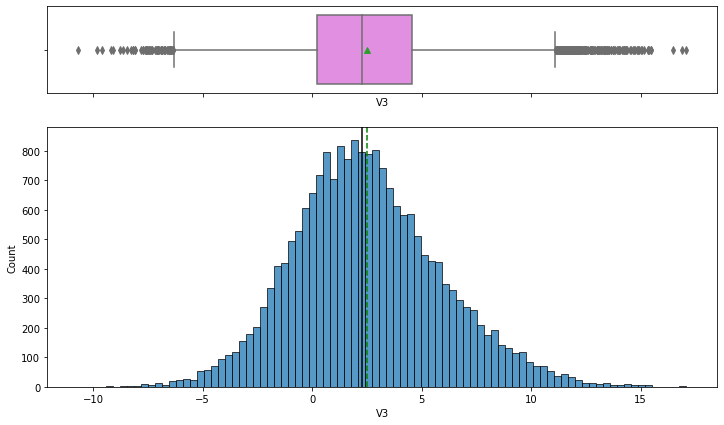

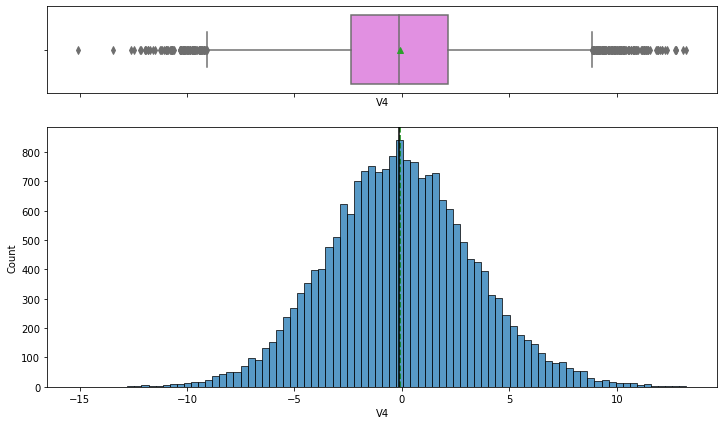

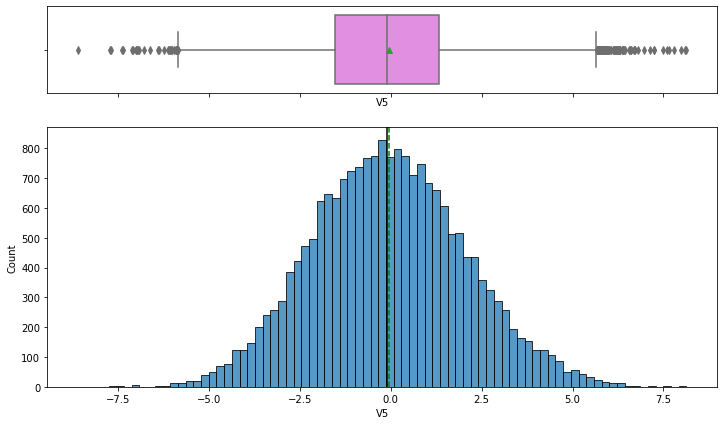

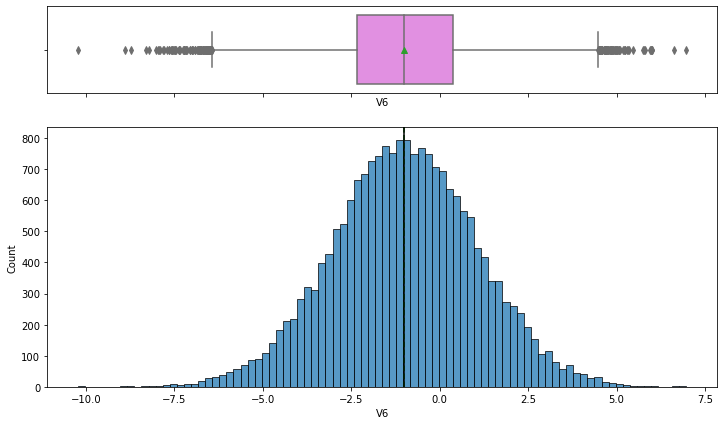

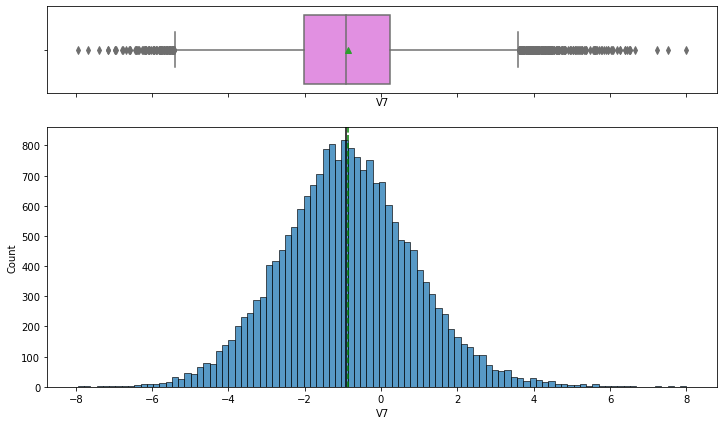

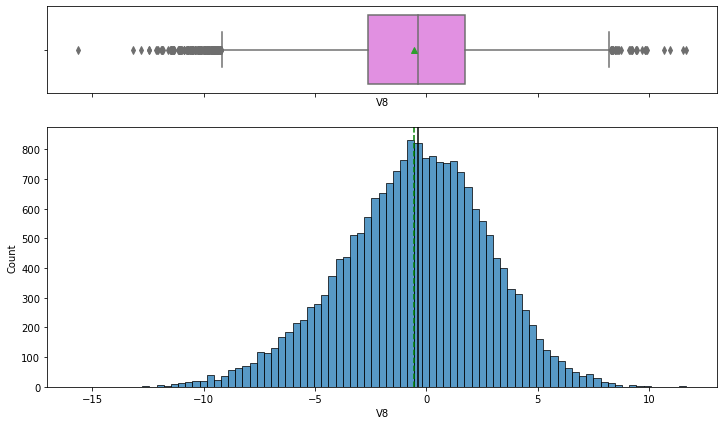

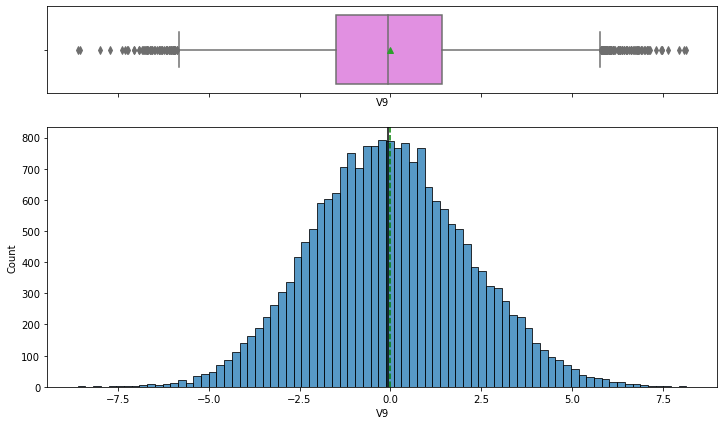

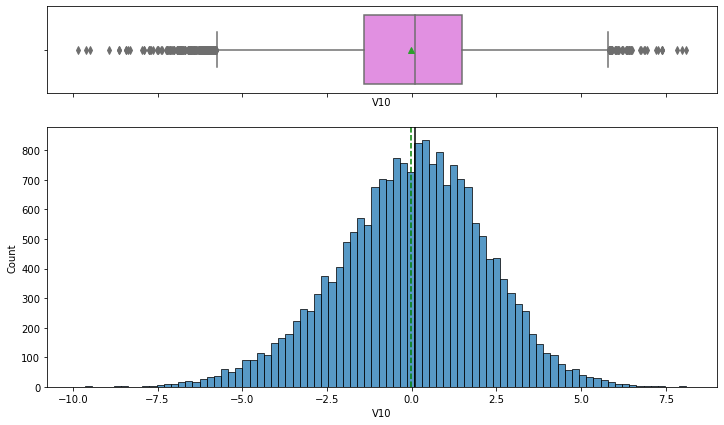

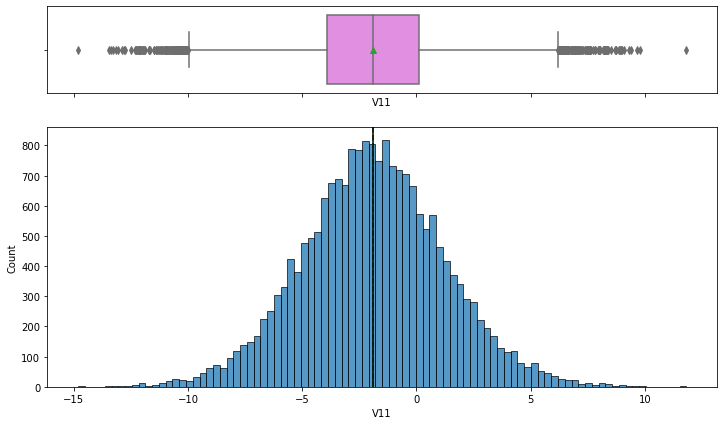

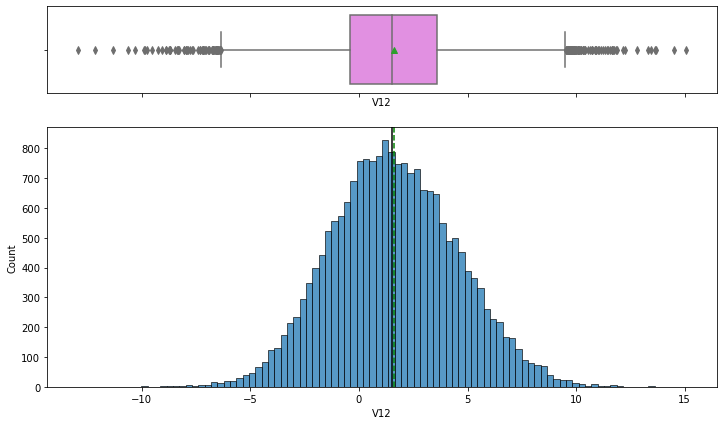

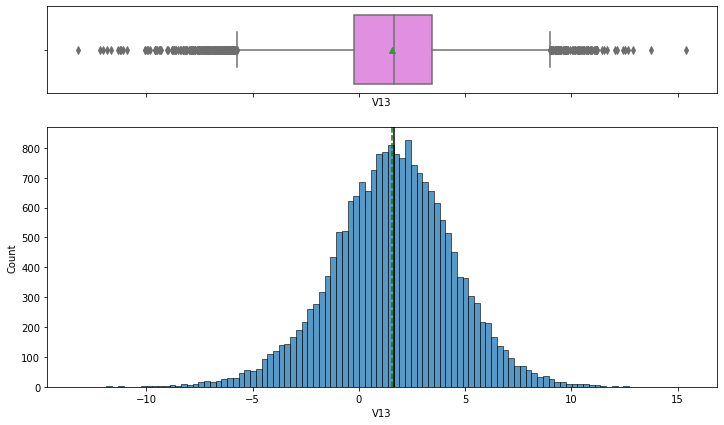

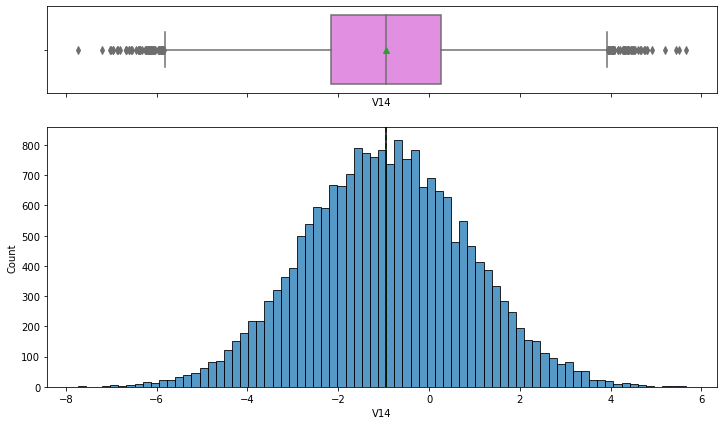

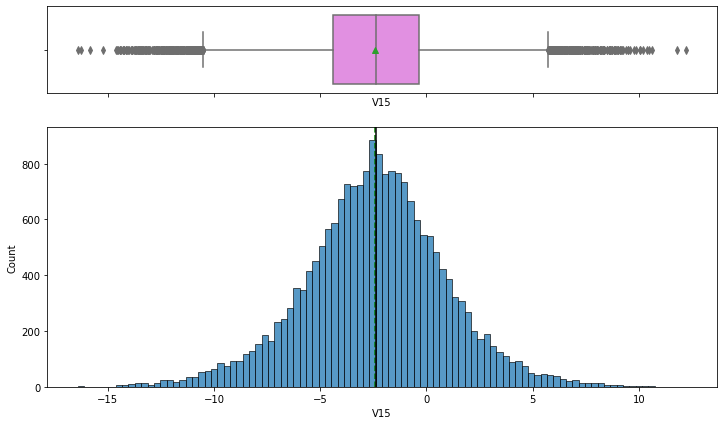

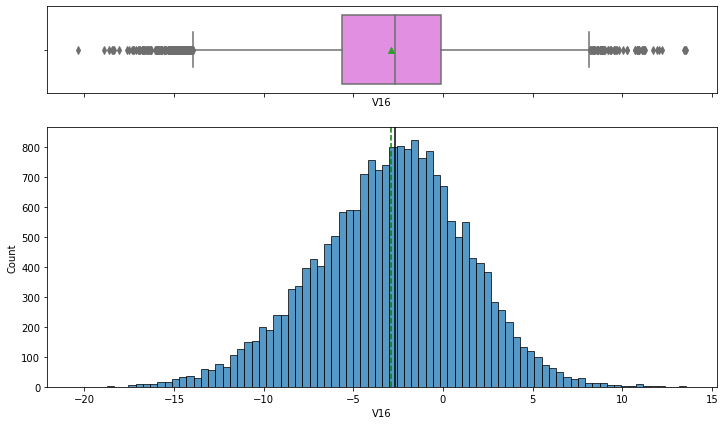

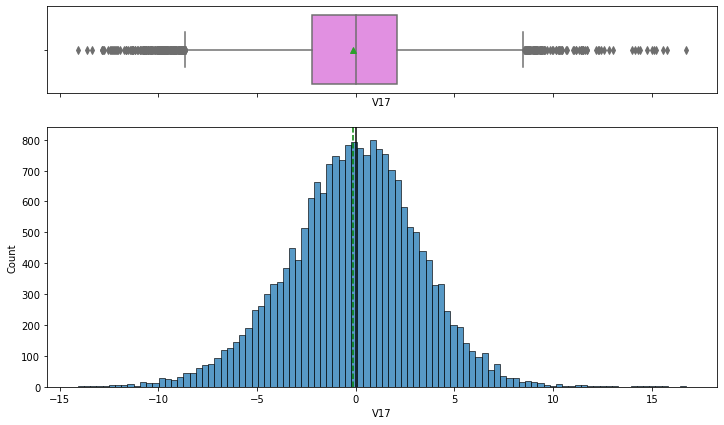

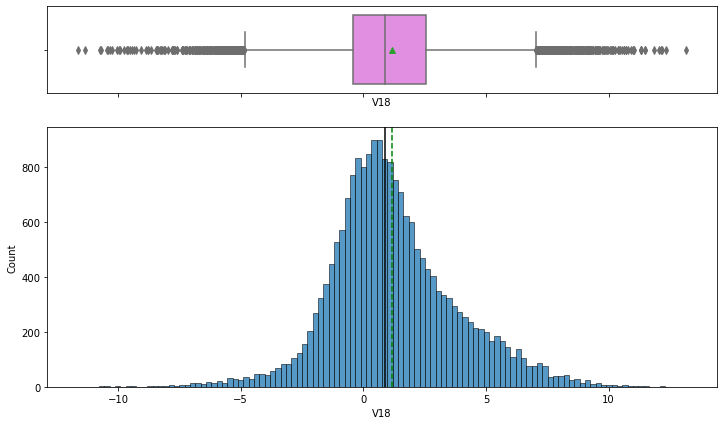

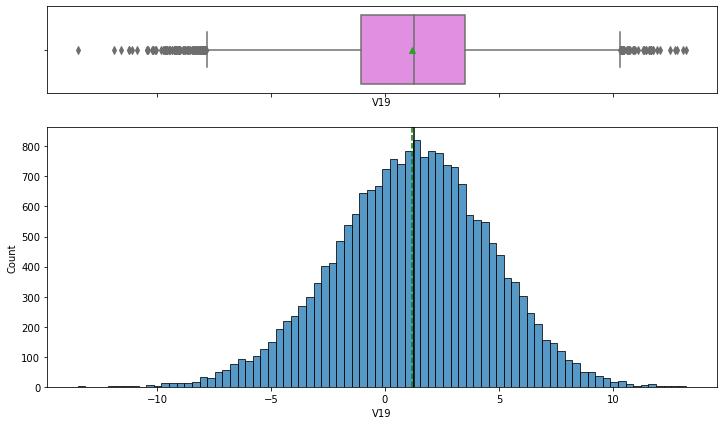

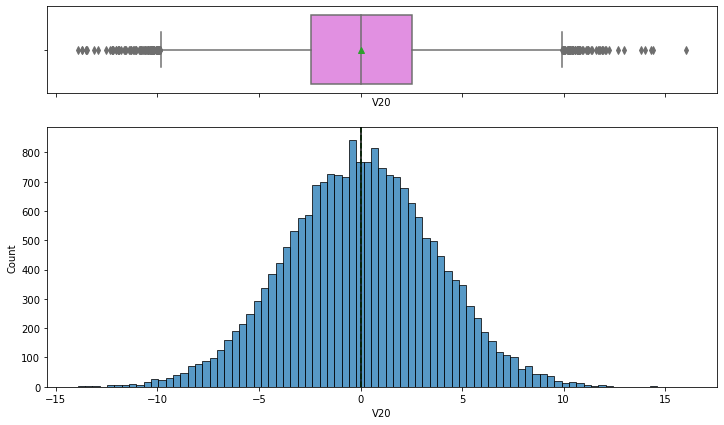

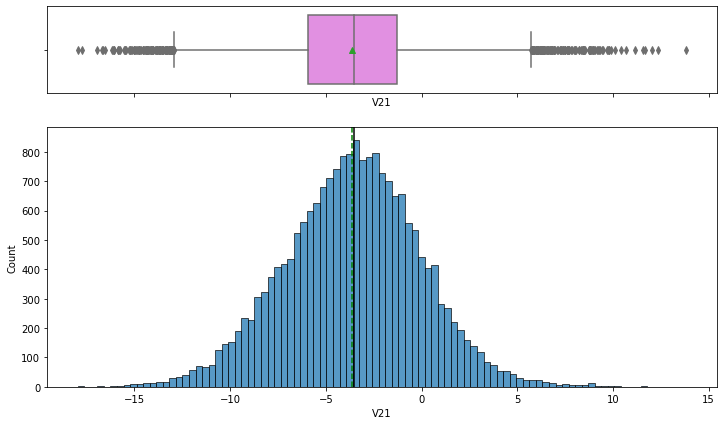

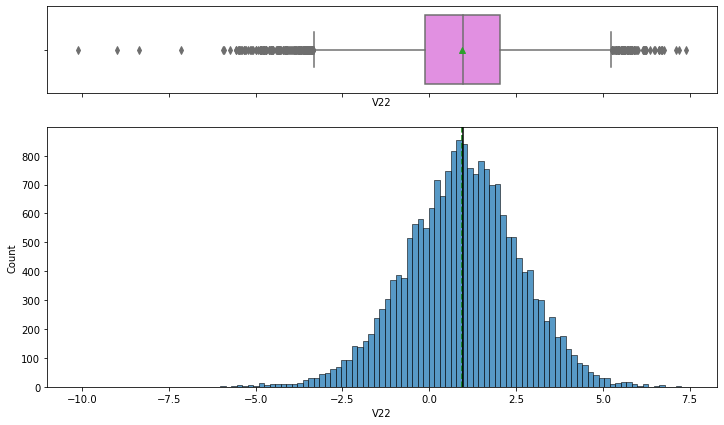

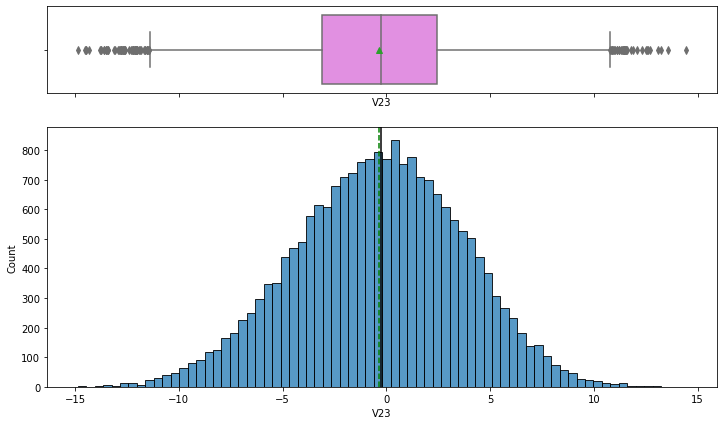

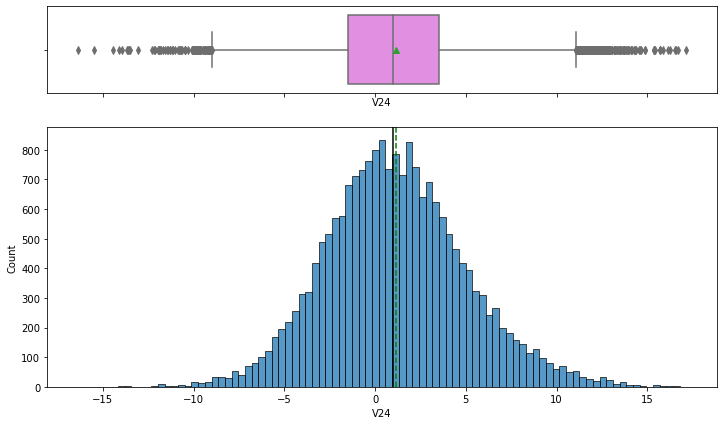

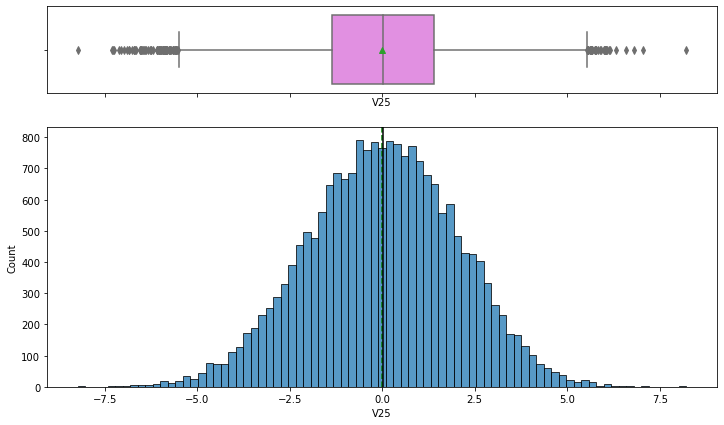

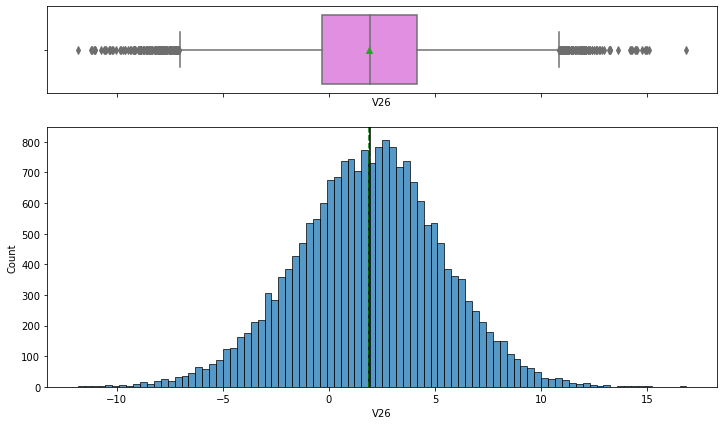

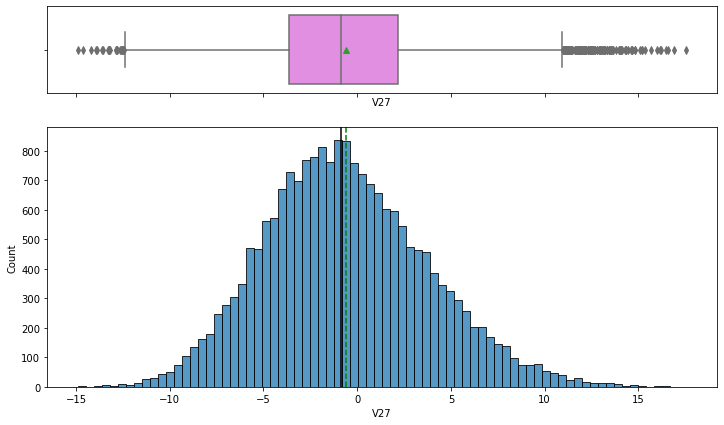

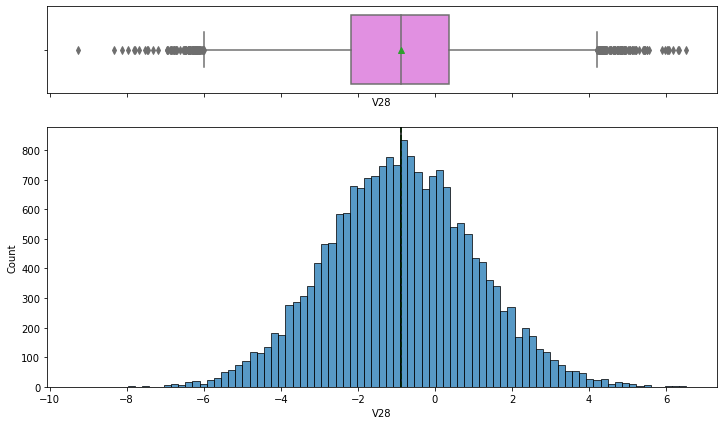

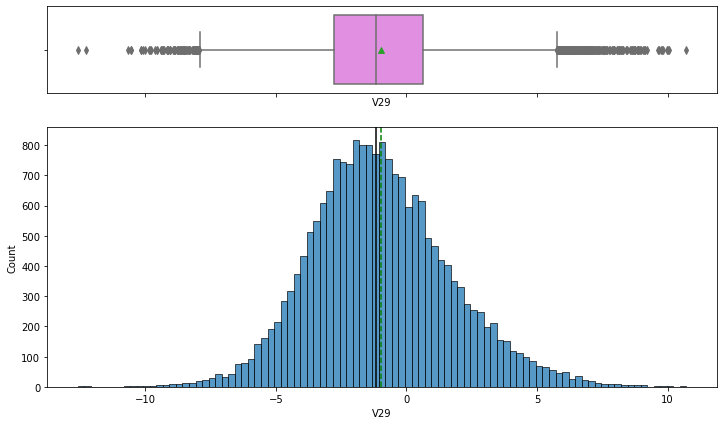

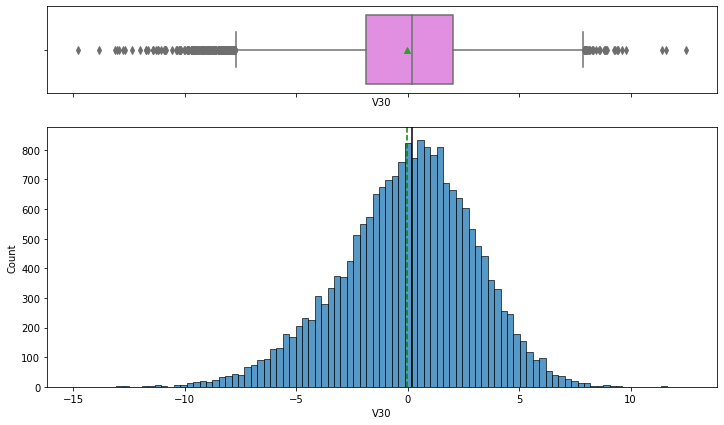

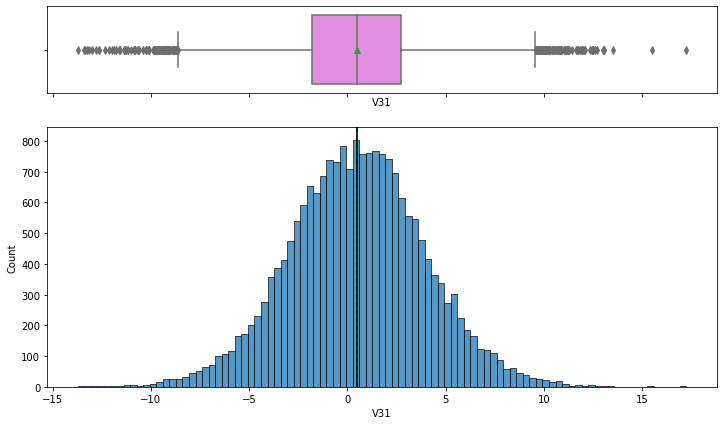

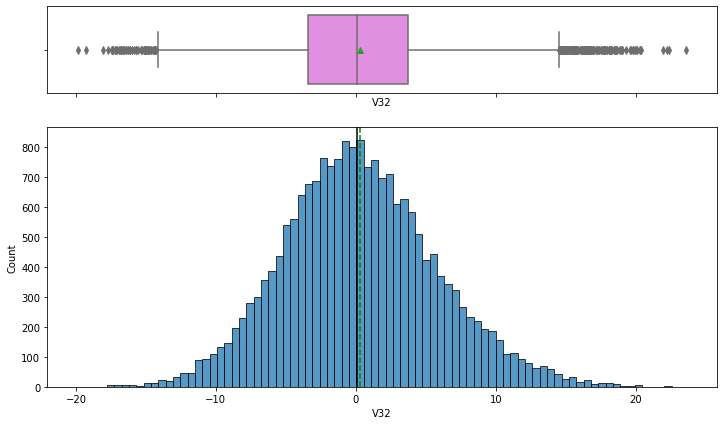

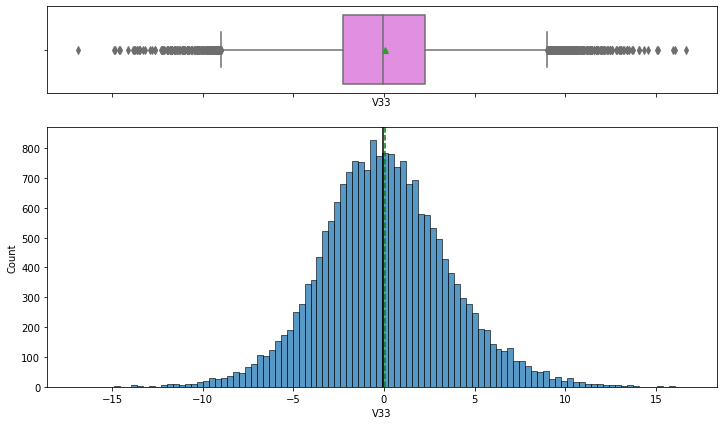

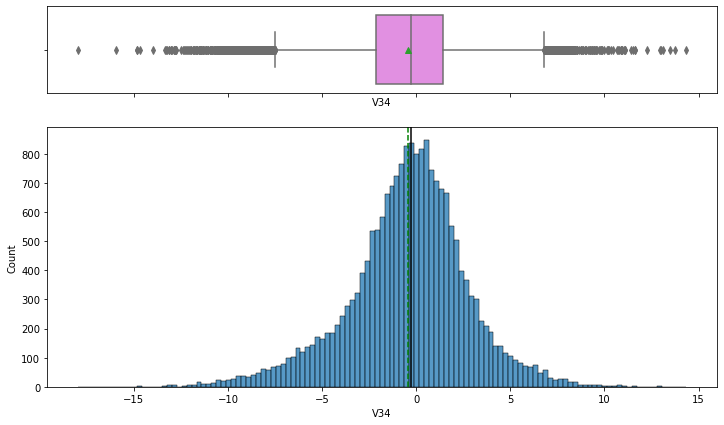

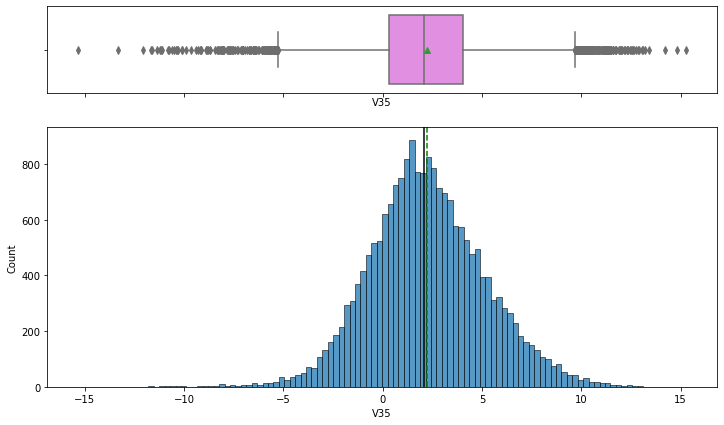

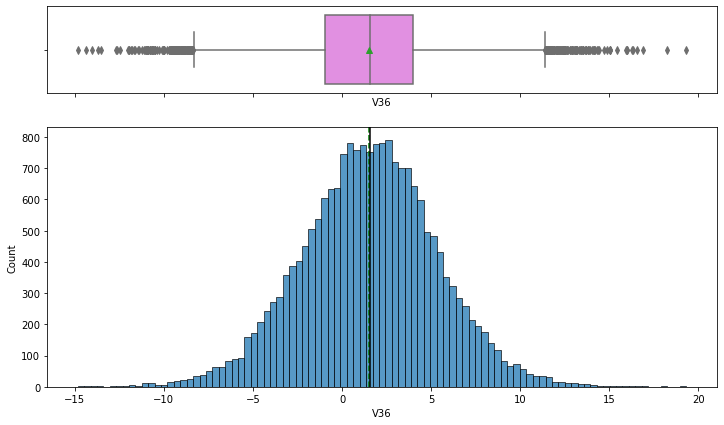

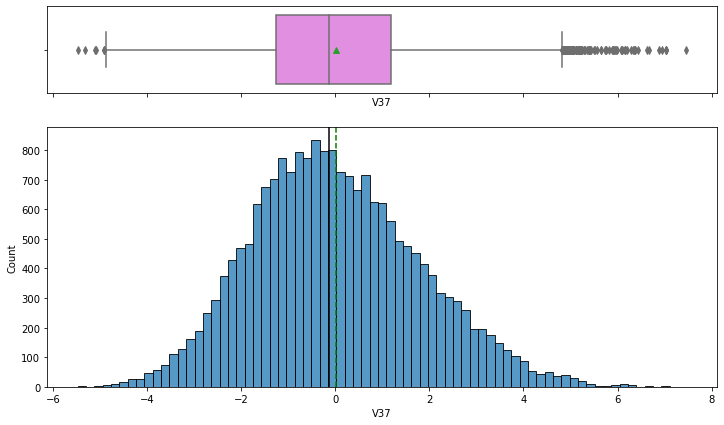

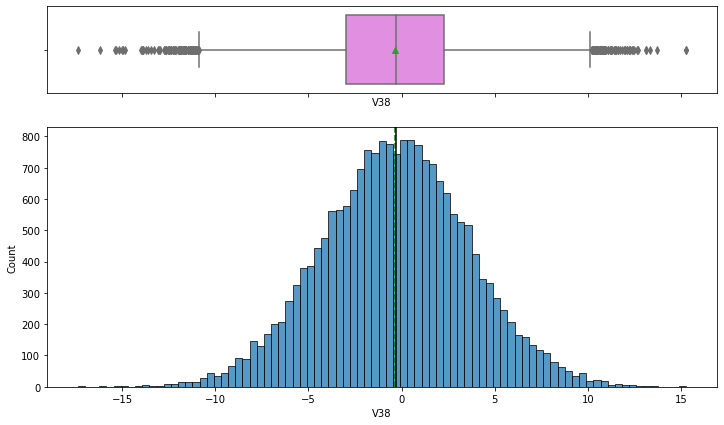

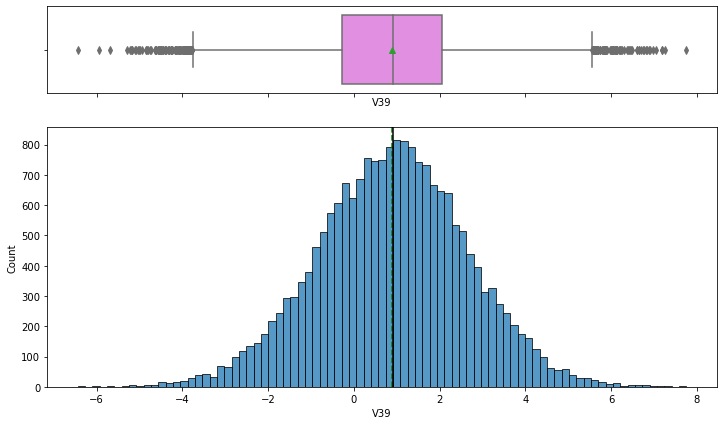

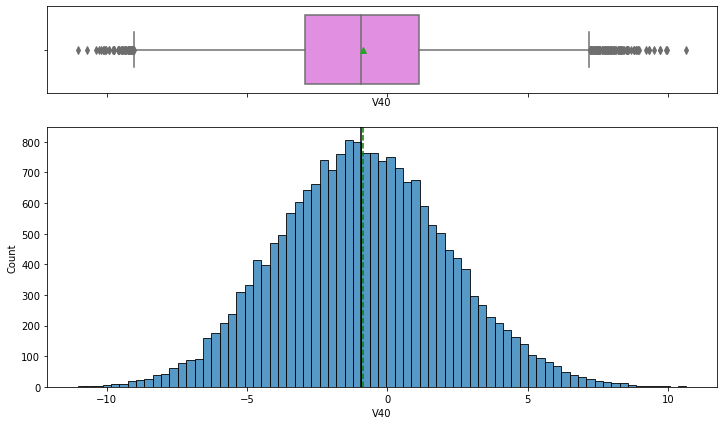

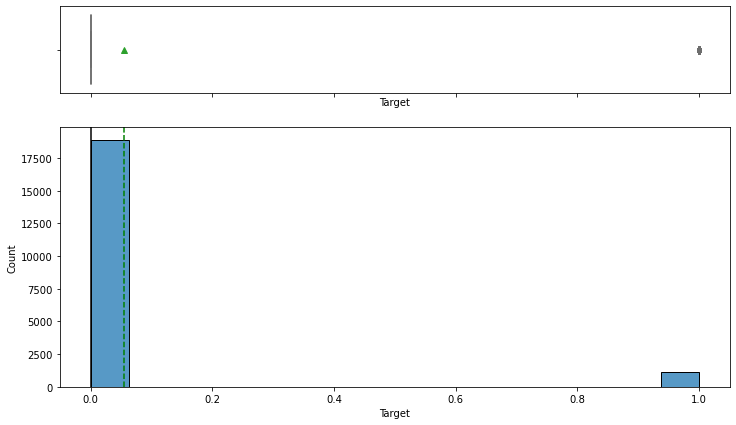

In [11]:
for feature in d_train.columns:
    histogram_boxplot(d_train, feature, figsize=(12, 7), kde=False, bins=None)

### Observation:
* Most of the data is normally distributed.
* Most of the box plots show outliers.
* Target variable is binary value.

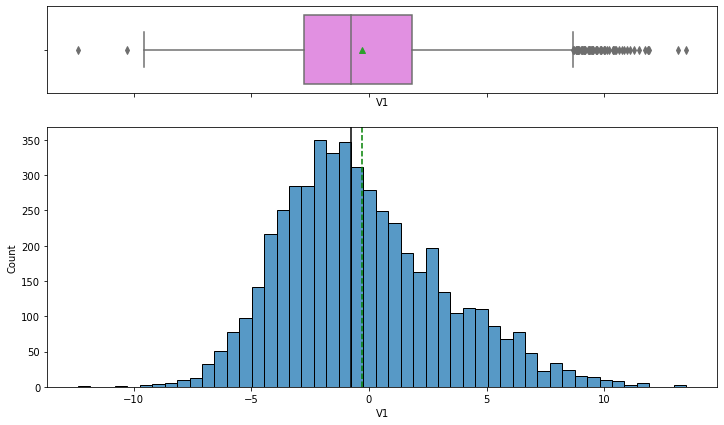

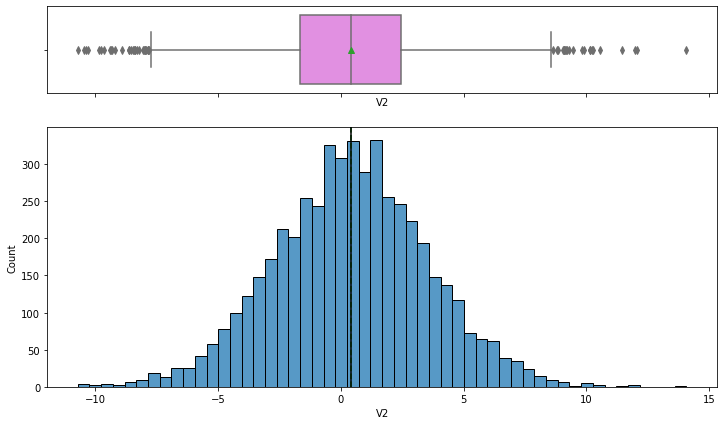

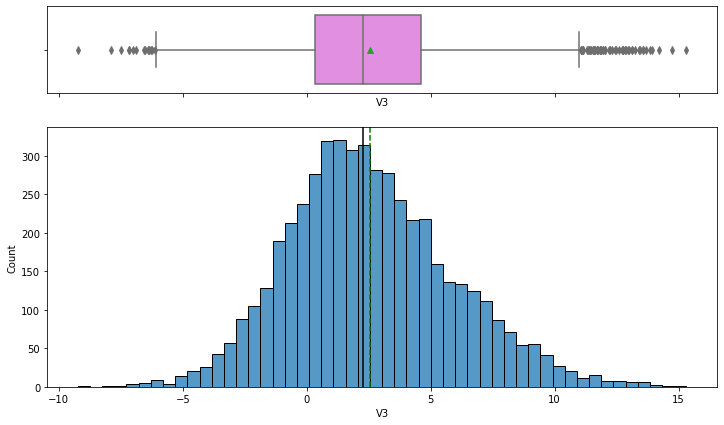

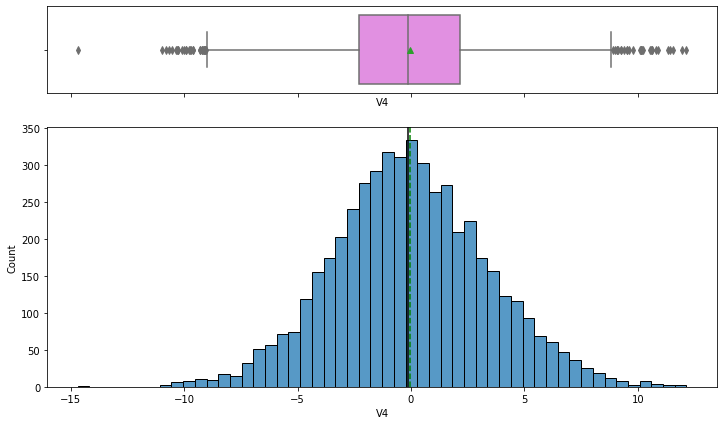

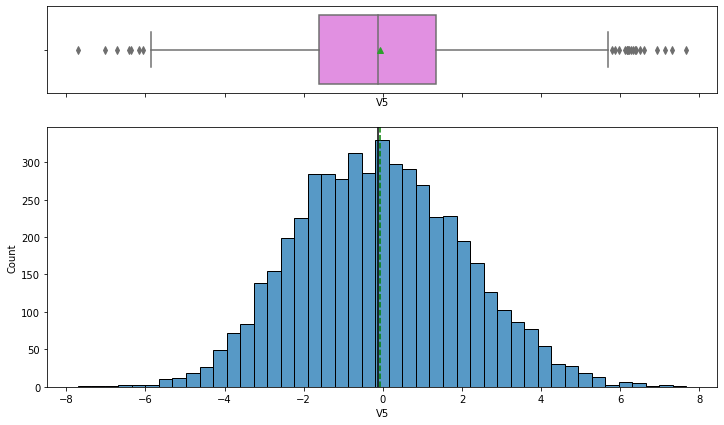

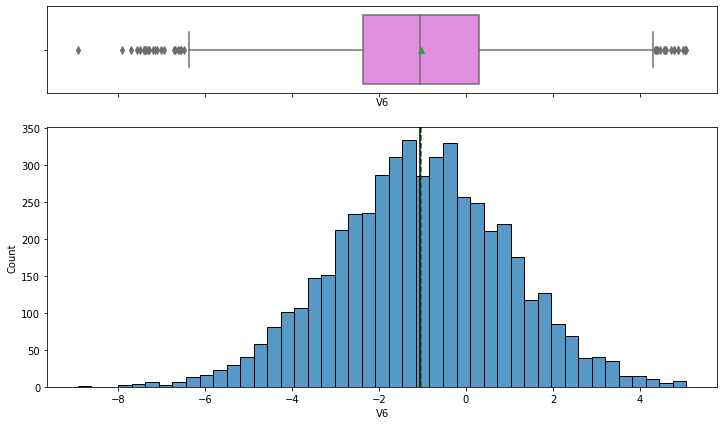

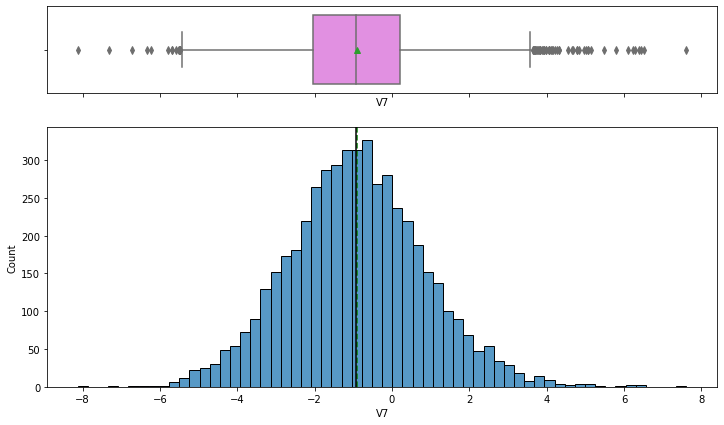

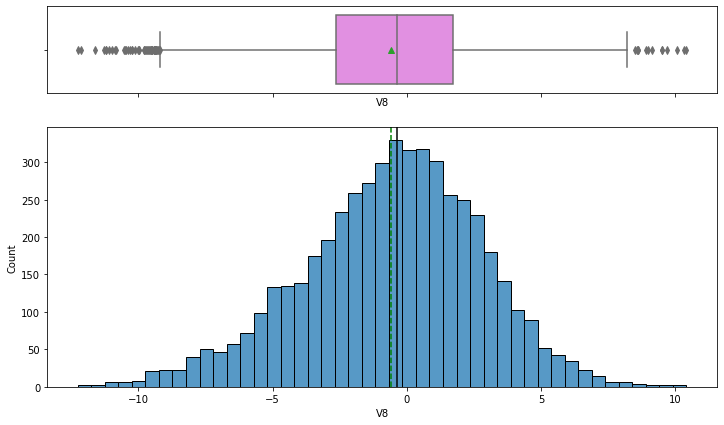

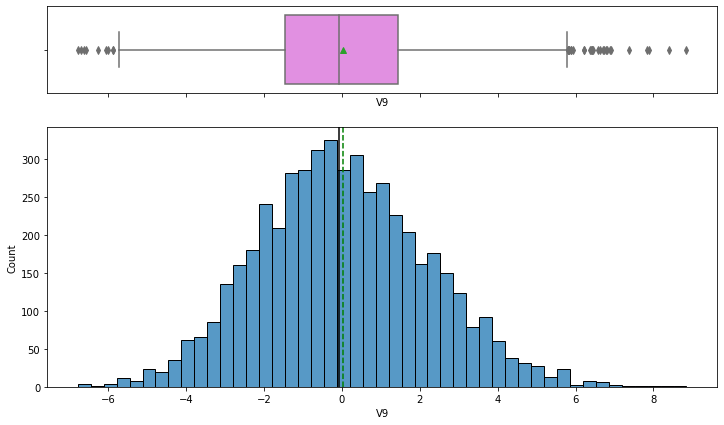

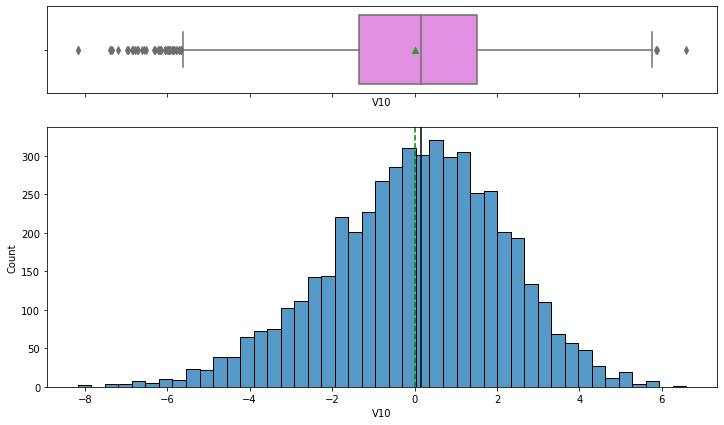

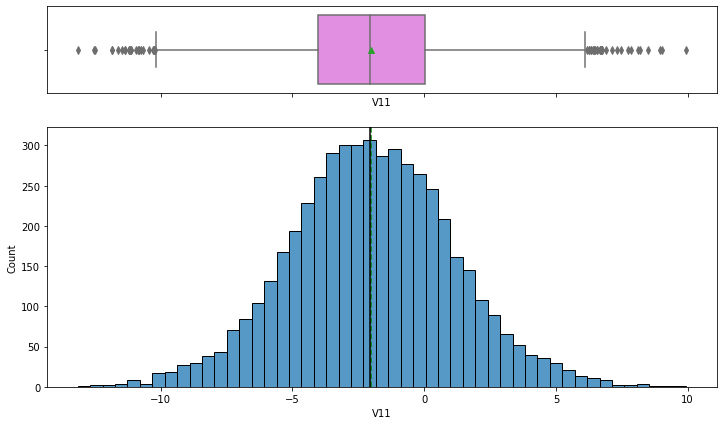

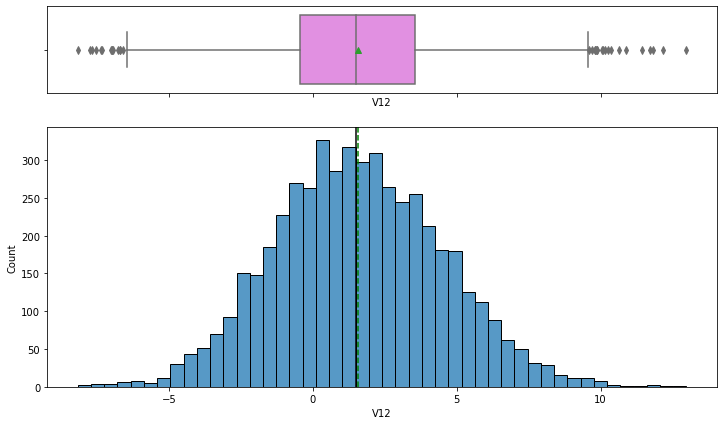

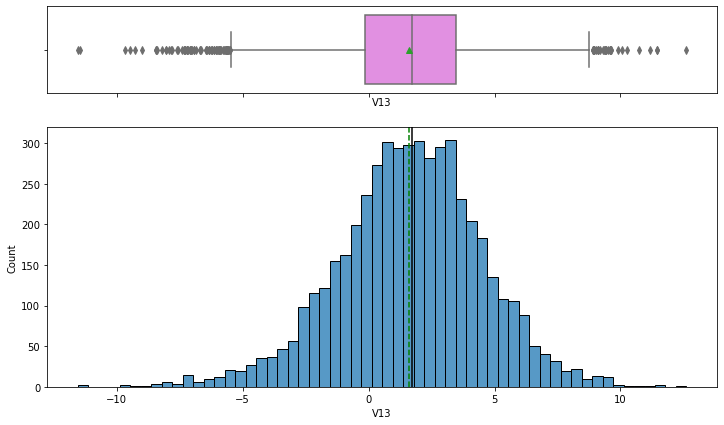

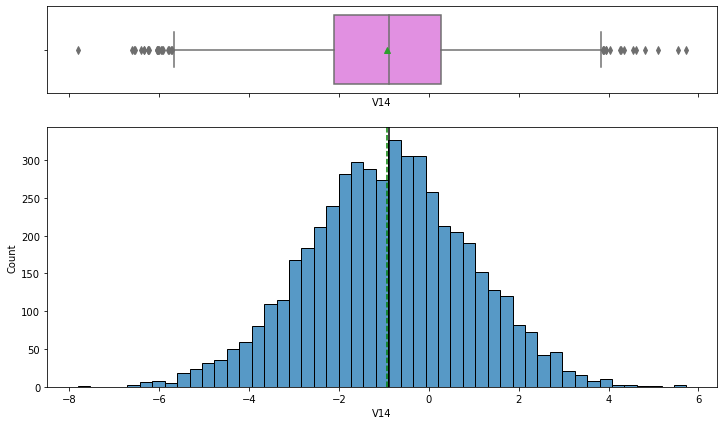

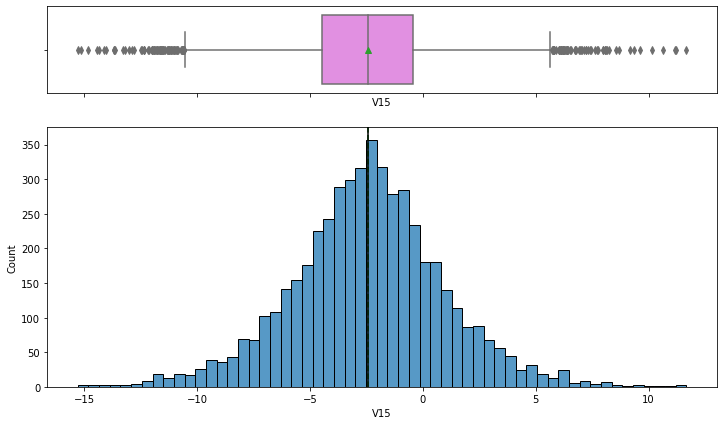

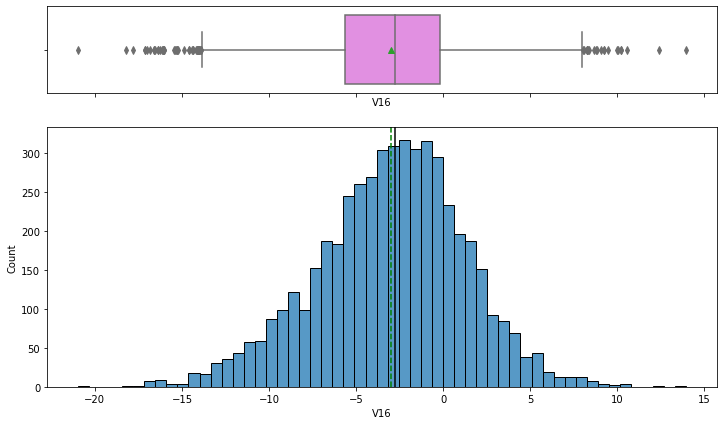

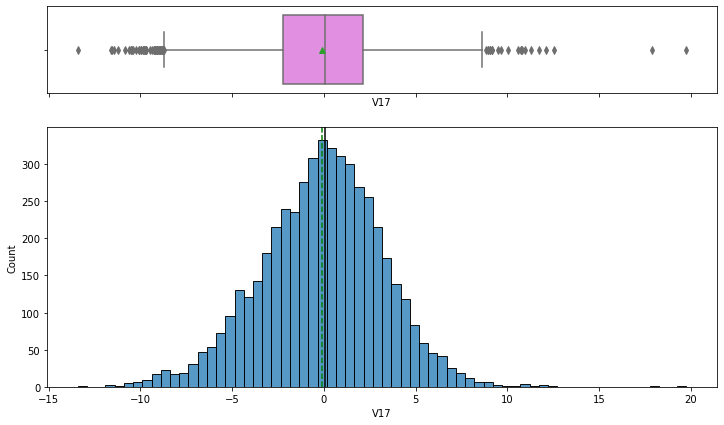

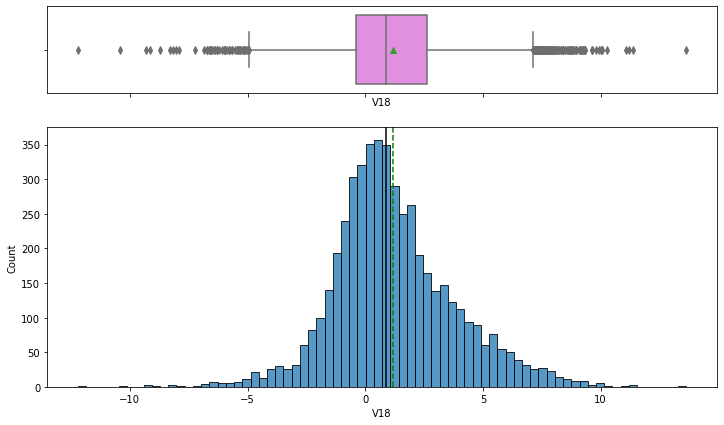

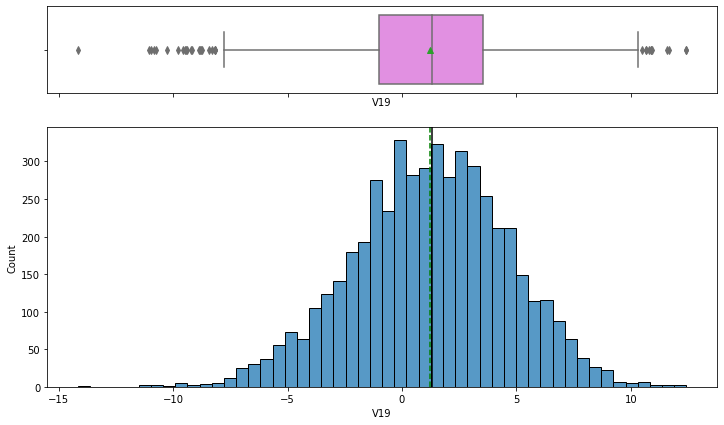

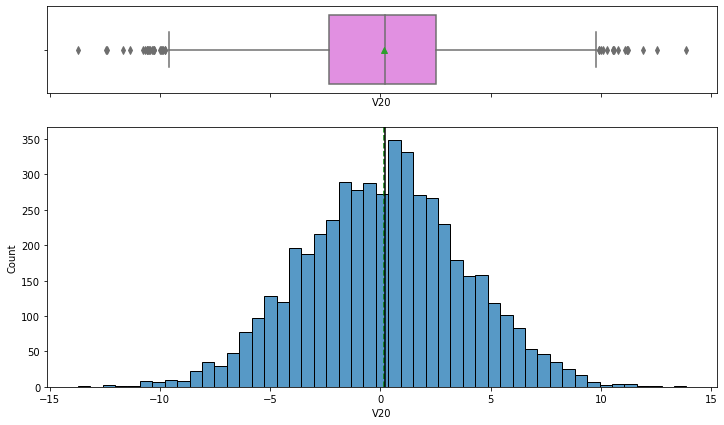

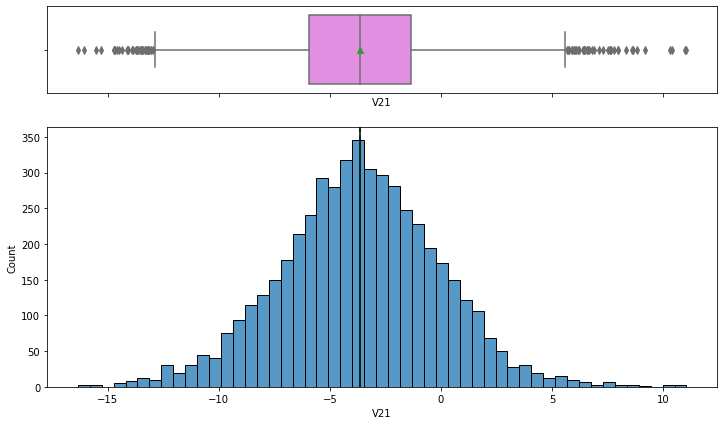

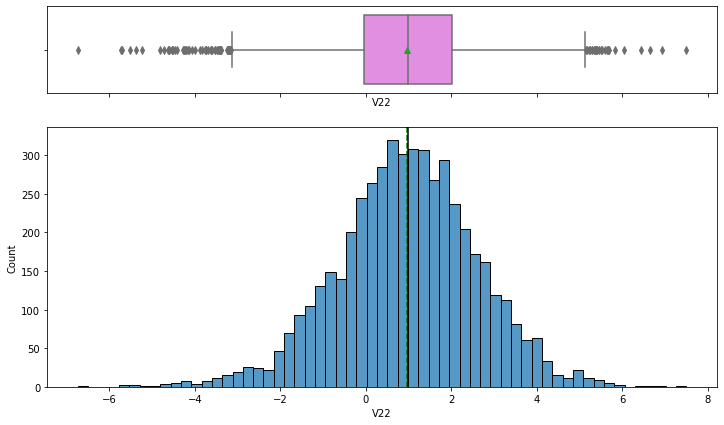

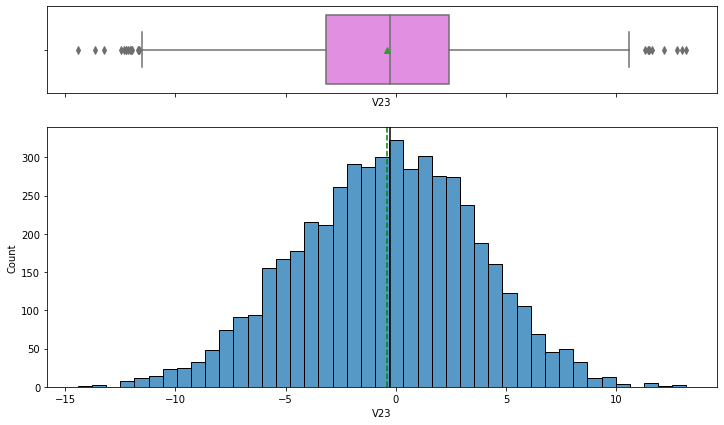

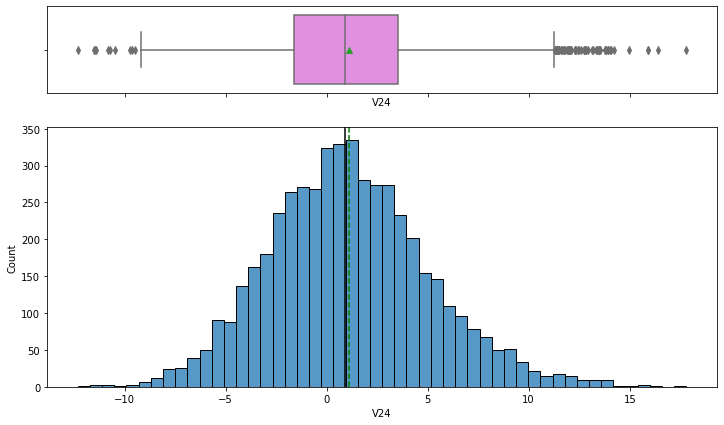

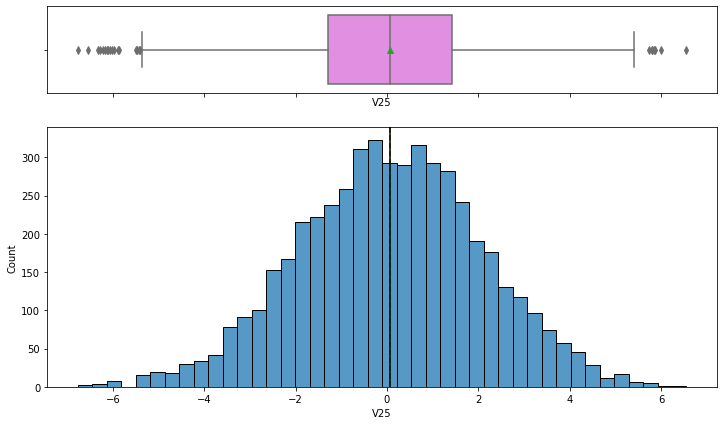

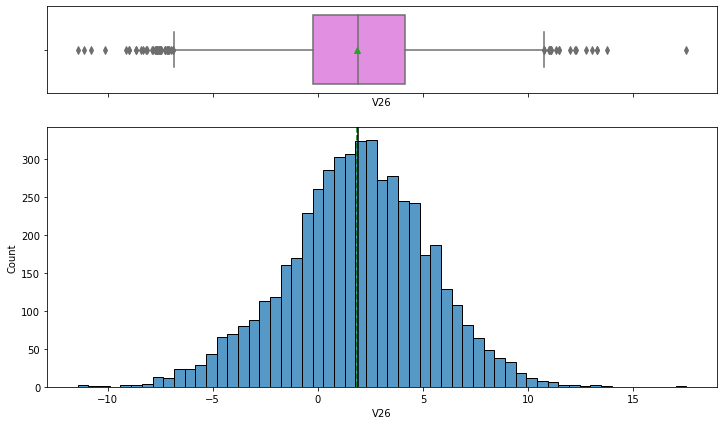

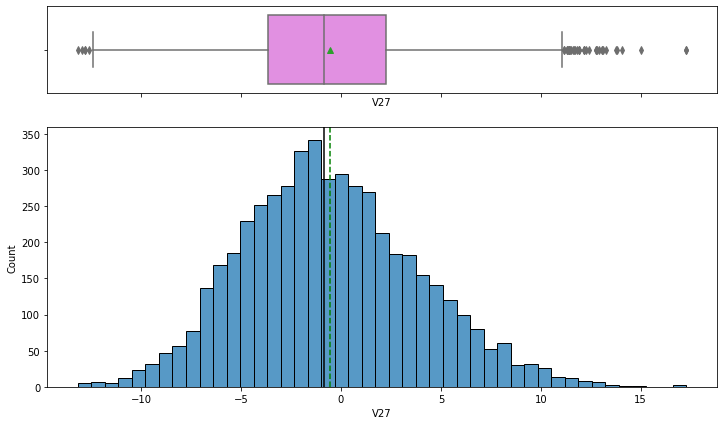

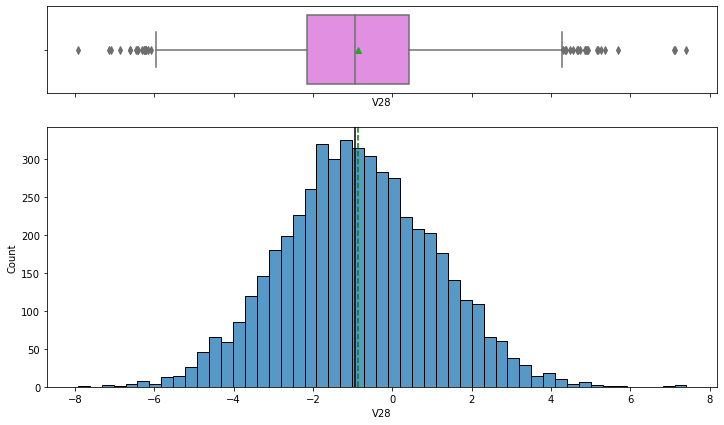

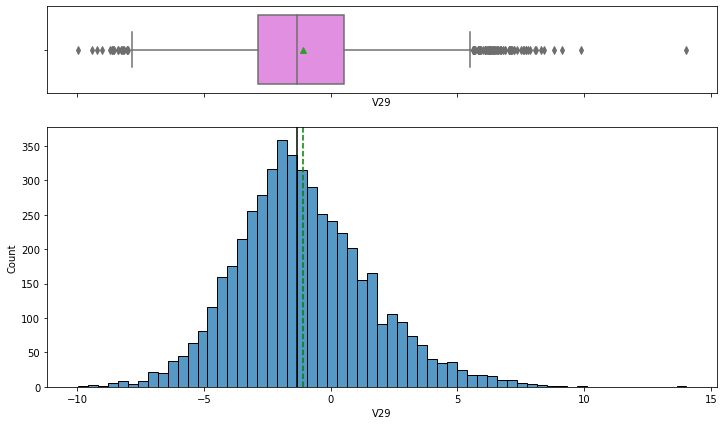

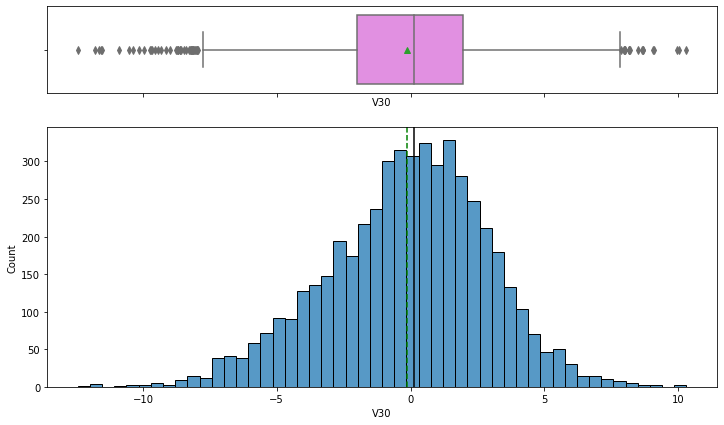

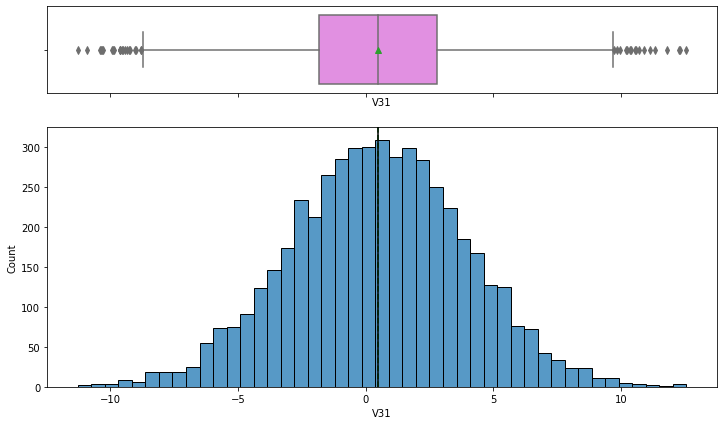

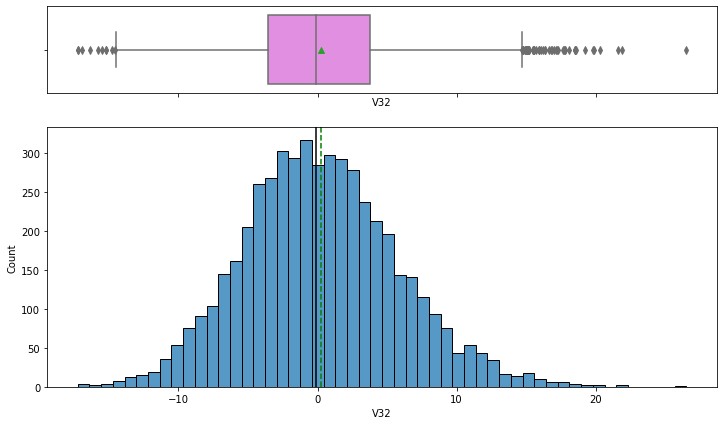

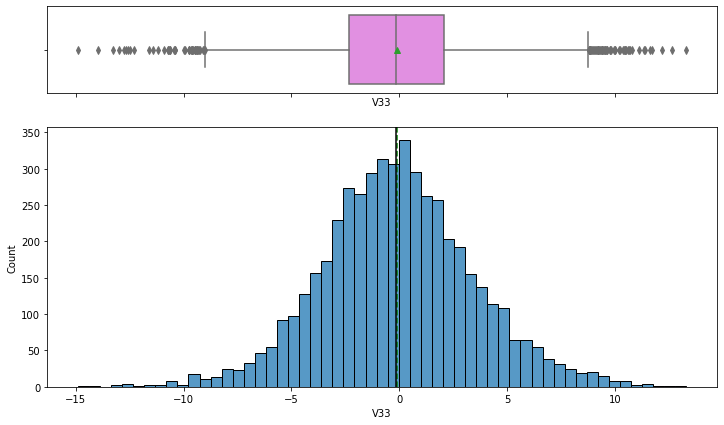

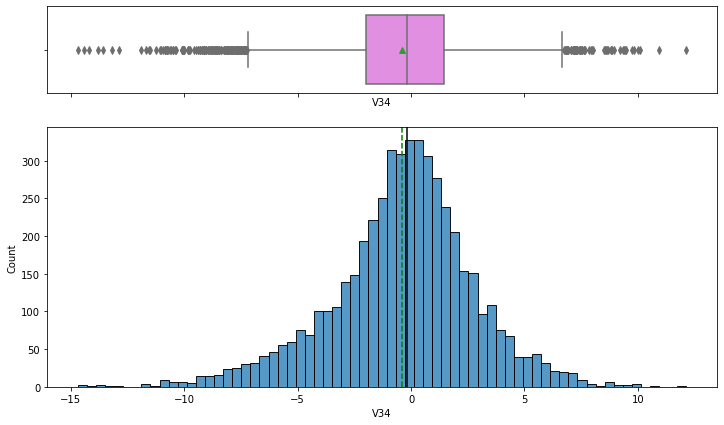

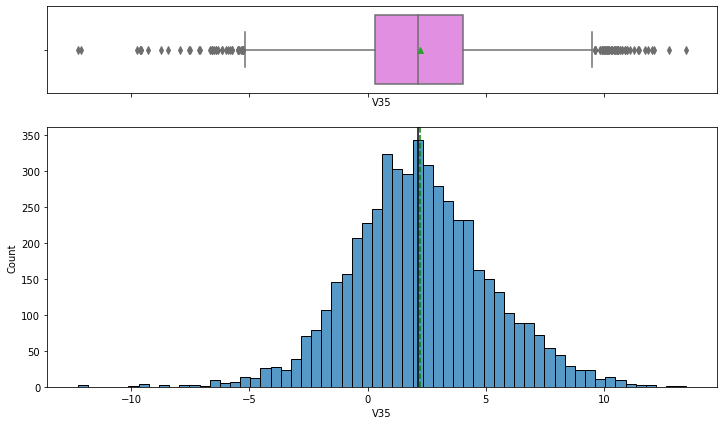

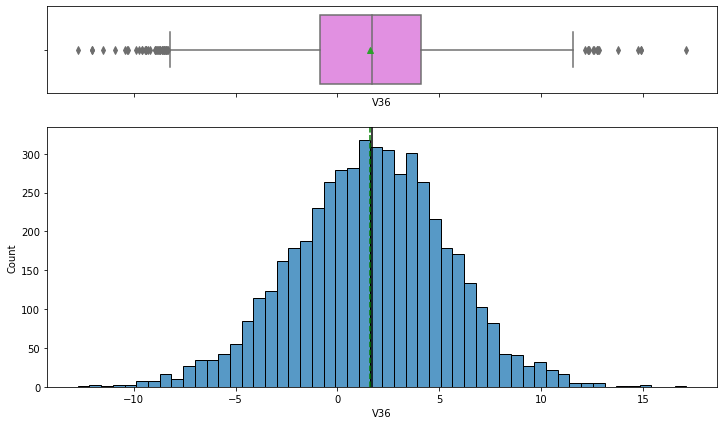

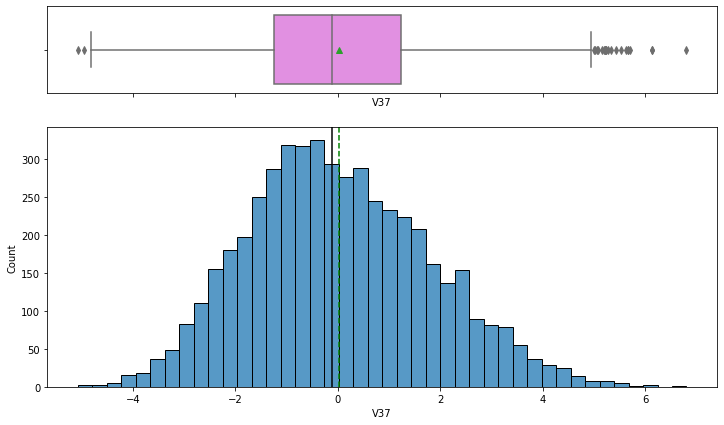

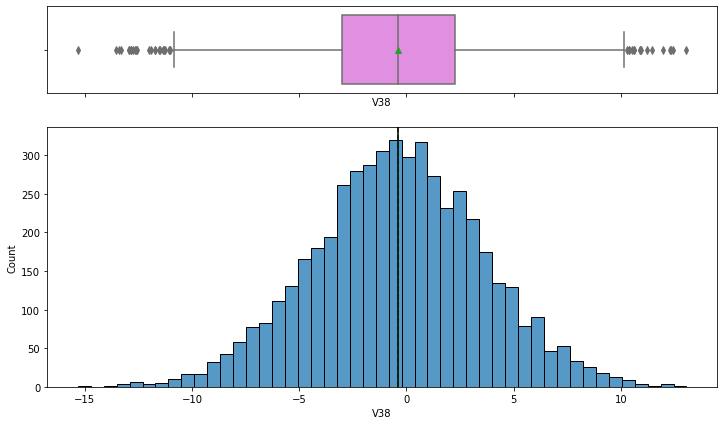

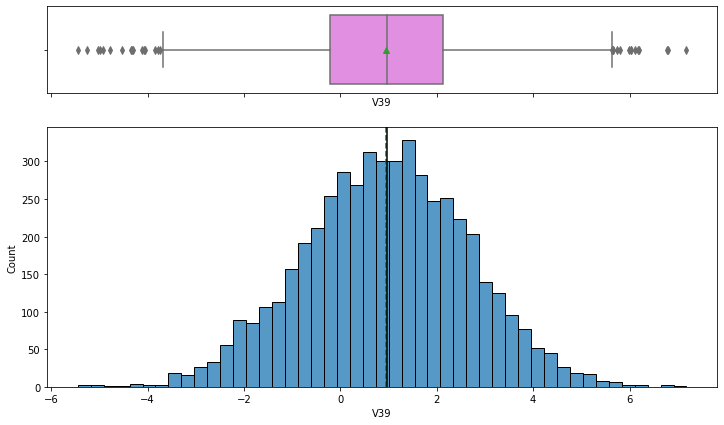

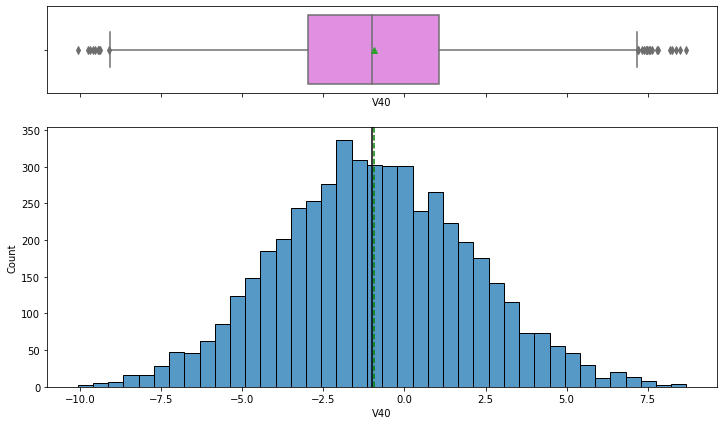

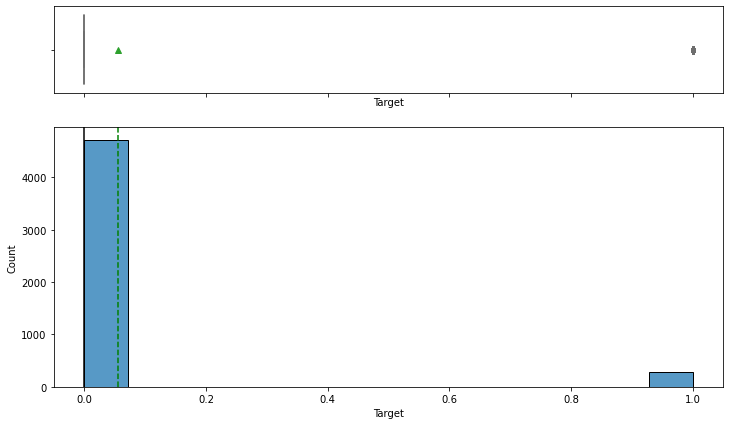

In [16]:
for feature in d_test.columns:
    histogram_boxplot(d_test, feature, figsize=(12, 7), kde=False, bins=None)

### Observation: 
* Test data is similar to the train data.
* Most of the data is normally distributed.
* Most of the box plots show outliers.
* Target variable is binary value.

### Labelled Bar plot on the Target variable on the Train data

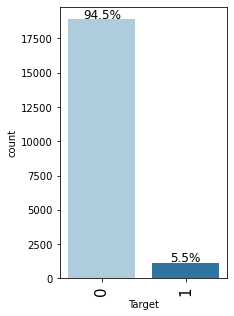

In [255]:
# Labelled Barplot to understand the balance in Binary value of the Target Variable 
labeled_barplot(d_train,'Target',perc=True)
plt.show()

### Observation:
* Most of the data is No failures only 5.5% is observed as failures in the Train data set.
* However, there is an imbalance  in majority and minority class.

### Labelled Bar plot on the Target variable on the Test data

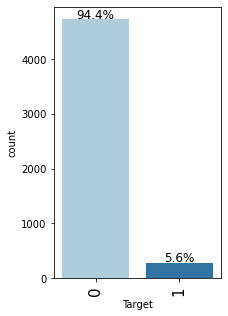

In [257]:
# Labelled Barplot to understand the balance in Binary value of the Target Variable
labeled_barplot(d_test,'Target',perc=True)
plt.show()

### Observation:
* Most of the data is No failures only 5.6% is observed as failures in the Test data set
* However, there is an imbalance  in majority and minority class.

## Bi variate Analysis 

### Histogram plots to view the distribution of the columns on the Train data

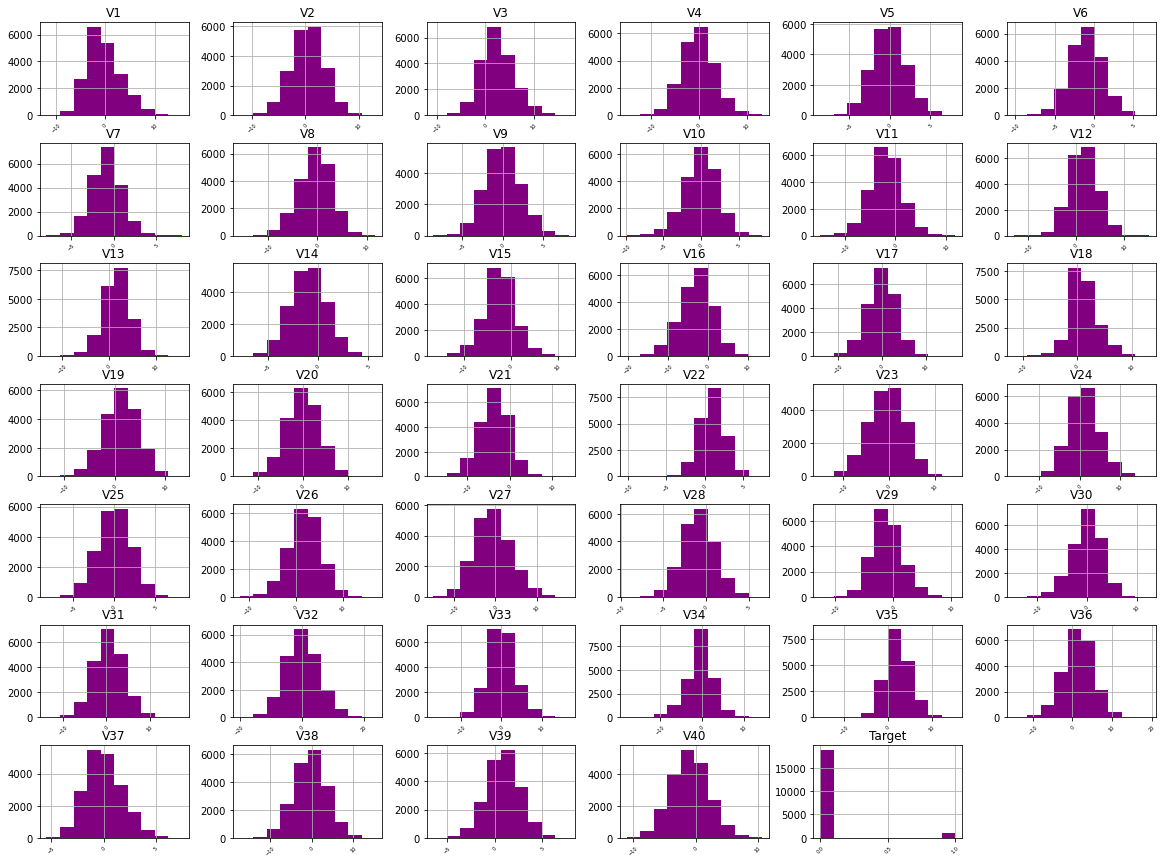

In [260]:
d_train.hist(figsize=(20,15),bins=10,color="purple",xlabelsize=5, ylabelsize=10,xrot=45 )
plt.show()

### Histogram plots to view the distribution of the columns on the Test data

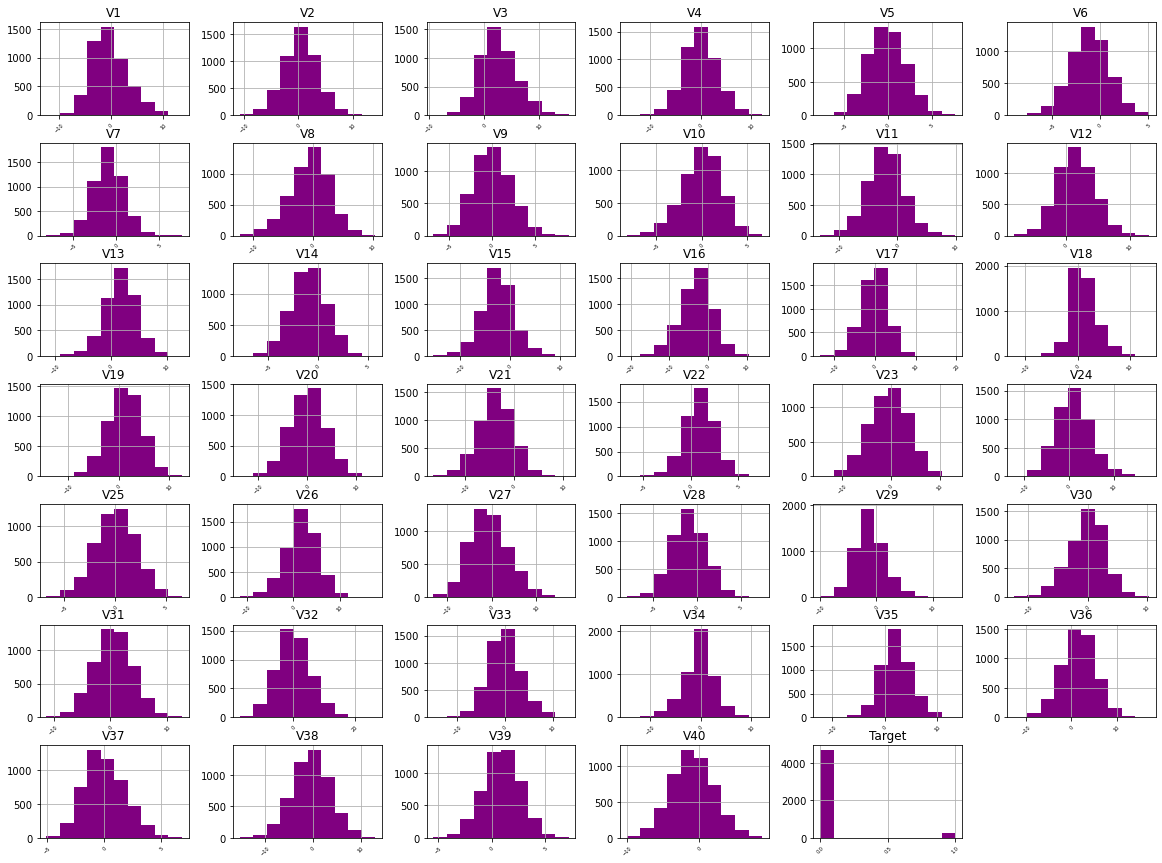

In [261]:
d_test.hist(figsize=(20,15),bins=10,color="purple",xlabelsize=5, ylabelsize=10,xrot=45 )
plt.show()

### Observation : 
* As, observed in both train and test data the data is normally distributed. Except for the Target variable as it is a Binary variable.

## Heat map to check the correlation on the Test Data 

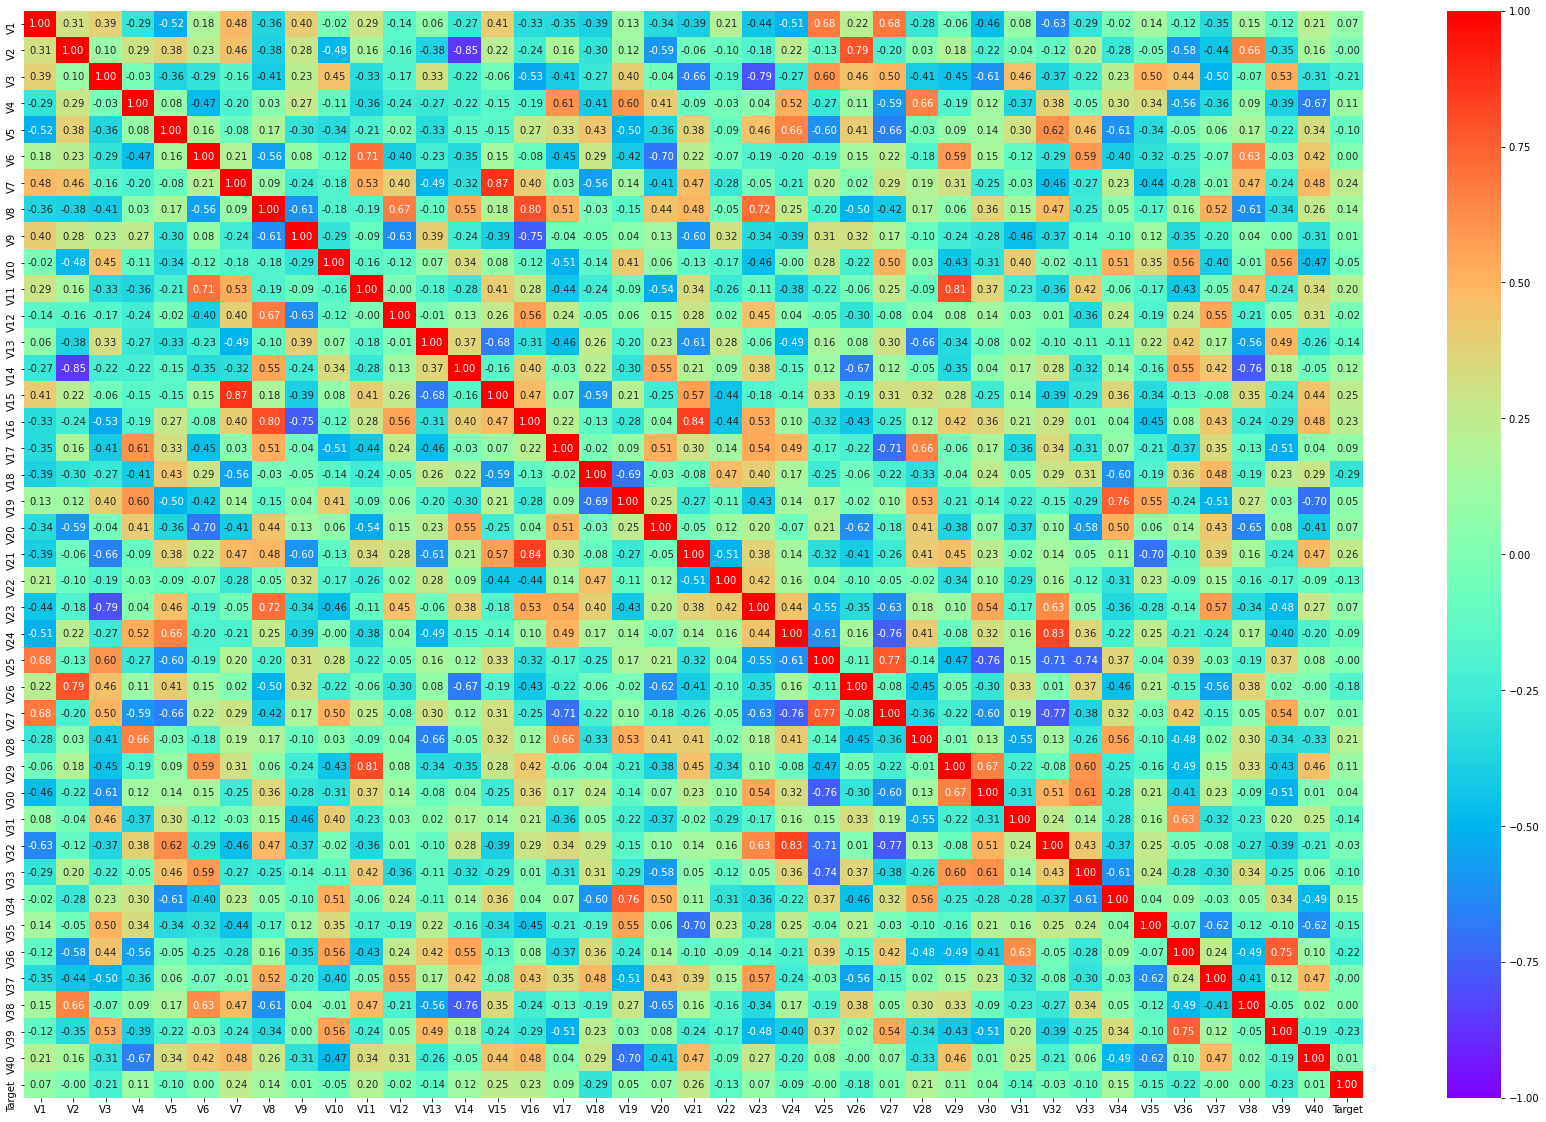

In [272]:
plt.figure(figsize=(30, 20))
sns.heatmap(
        d_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="rainbow"
)
plt.show()

## Heat map to check the correlation on the Train Data 

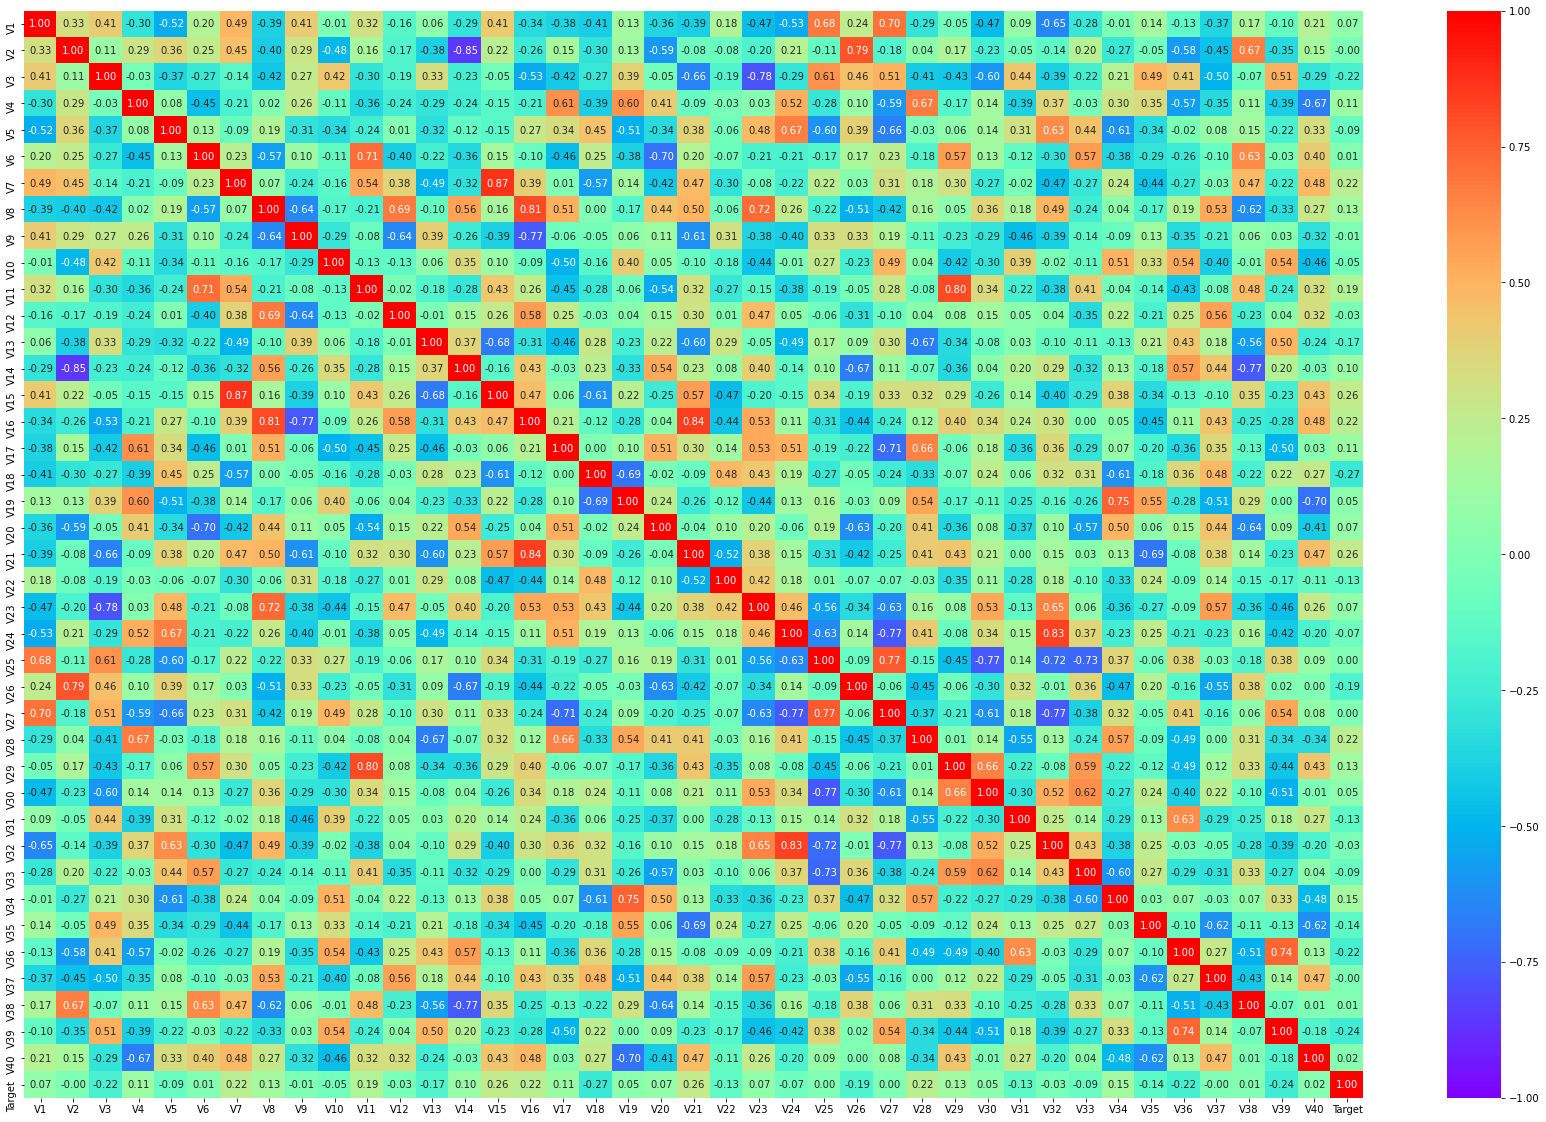

In [273]:
plt.figure(figsize=(30, 20))
sns.heatmap(
        d_test.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="rainbow"
)
plt.show()

### Observation: 
* Both the Test and Train data Heat Maps are similar.
* Also, it is observed that many of the variables are highly correlated.


## Data Pre-processing

In [80]:
# Dividing data into X and y
X = d_train.drop(['Target'], axis=1)
y = d_train['Target']

X_test = d_test.drop(['Target'], axis = 1)
y_test = d_test['Target']

In [84]:
# Splitting data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
print(X_train.shape, X_val.shape, X_test.shape)

(15000, 40) (5000, 40) (5000, 40)


### Missing value Imputing
* To avoid data leakage we will impute missing values after splitting train data.
* We will impute the missing data with the median values

In [87]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy='median')

In [88]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val =  pd.DataFrame(imputer.transform(X_val),columns= X_val.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [90]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

### Observation: 
* All the missing values have been imputed with the median values and there are zero missing values

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [127]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [128]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [129]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data 

In [130]:
%%time

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic regression: 0.4927566553639709
dtree: 0.6982829521679532
Bagging: 0.7210807301060529
Random forest: 0.7235192266070268
GBM: 0.7066661857008874
Adaboost: 0.6309140754635308
Xgboost: 0.7956208065796118

Validation Performance:

Logistic regression: 0.48201438848920863
dtree: 0.7050359712230215
Bagging: 0.7302158273381295
Random forest: 0.7266187050359713
GBM: 0.7230215827338129
Adaboost: 0.6762589928057554
Xgboost: 0.8201438848920863
Wall time: 3min 53s


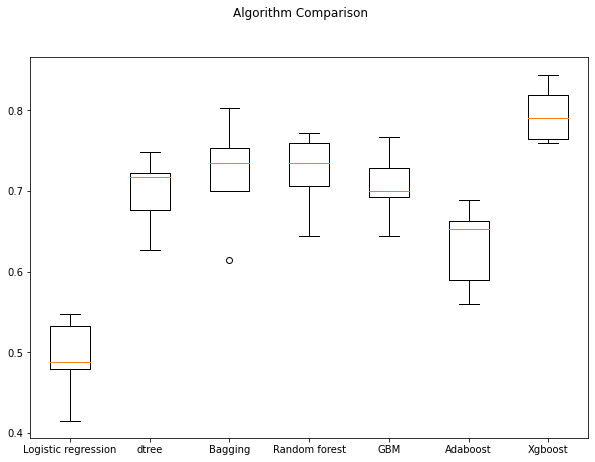

In [104]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Observation : 
* XG boost shows the highest performance score. However, the scores are very less

### Model Building with Oversampled data


In [105]:
# Synthetic Minority Over Sampling Technique
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 832
Before OverSampling, counts of label '0': 14168 

After OverSampling, counts of label '1': 14168
After OverSampling, counts of label '0': 14168 

After OverSampling, the shape of train_X: (28336, 40)
After OverSampling, the shape of train_y: (28336,) 



In [109]:
%%time

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over,scoring = scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 0.883963699328486
Bagging: 0.9762141471581656
Random forest: 0.9839075260047615
GBM: 0.9256068151319724
Adaboost: 0.8978689011775473
Xgboost: 0.989554053559209
dtree: 0.9720494245534969

Validation Performance:

Logistic regression: 0.8489208633093526
Bagging: 0.8345323741007195
Random forest: 0.8489208633093526
GBM: 0.8776978417266187
Adaboost: 0.8561151079136691
Xgboost: 0.8669064748201439
dtree: 0.7769784172661871
Wall time: 8min 6s


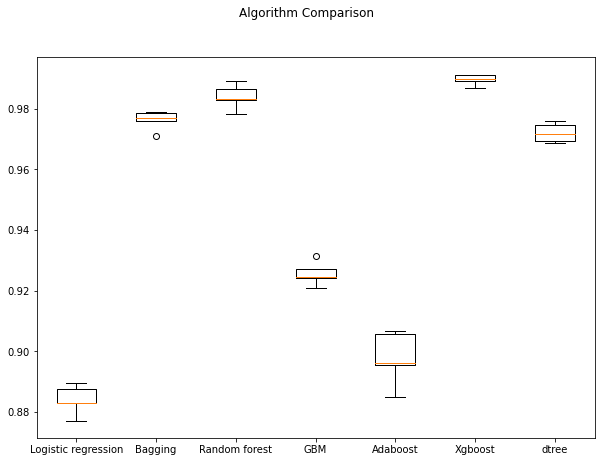

In [110]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Observation: 
* Bagging, Random Forest and XG boost are performing really well for the over sampled data. 

### Model Building with Undersampled data

In [111]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168 

After UnderSampling, counts of label '1': 832
After UnderSampling, counts of label '0': 832 

After UnderSampling, the shape of train_X: (1664, 40)
After UnderSampling, the shape of train_y: (1664,) 



In [113]:
%%time

models = []  # Empty list to store all the models
# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss",n_jobs=-1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un,scoring = scorer, cv=kfold,n_jobs =-1
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 0.8726138085275232
Bagging: 0.8641945025611427
Random forest: 0.9038669648654498
GBM: 0.8990621167303946
Adaboost: 0.8666113556020489
Xgboost: 0.9074742082100858
dtree: 0.8617776495202367

Validation Performance:

Logistic regression: 0.8525179856115108
Bagging: 0.8705035971223022
Random forest: 0.8920863309352518
GBM: 0.8884892086330936
Adaboost: 0.8489208633093526
Xgboost: 0.9028776978417267
dtree: 0.841726618705036
Wall time: 13.9 s


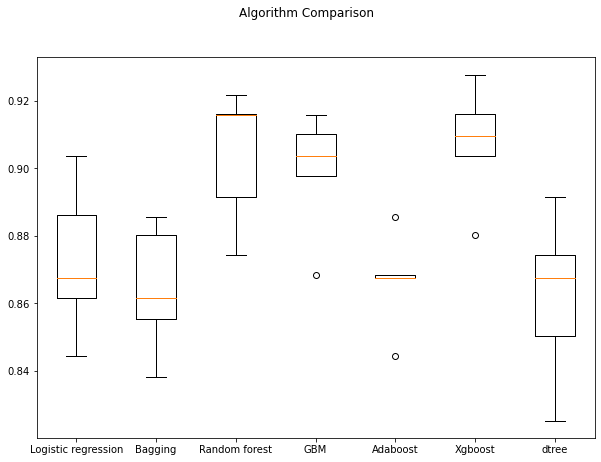

In [114]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Observation : 
* Random Forest and XGboost have good scores with the under sample data.
* However,the scores for the Oversampled data are better than the Undersampled data.

### Insights and Model Selection:
* As,observed from the above models performed on the Original data , Oversampled data and Undersampled data. The Models performed on the Oversampled data has good Recall scores  when compared to the others models.
* Oversampled Bagging classifier, RandomForest Classifier and XG boost Classifier performed really well.
* Hence, Performing Hyperparamter Tuning on these 3 models perforemd on the over sampled data.

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

## Grid Search CV
### Performing Grid search on Bagging calssifier , Random Forest classifier  and XGboost classifier from the oversampled data

### Bagging Classifier Grid search Cross validation

In [131]:
%%time 

#defining model
model = BaggingClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid={ 'max_samples': [0.8,0.9,1],
            'max_features': [0.7,0.8,0.9],
            'n_estimators' : [30,50,70],
           }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)
#Fitting parameters in RandomizedSearchCV
grid_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters are {'max_features': 0.8, 'max_samples': 0.9, 'n_estimators': 70} with CV score=0.9828488269988673:
Wall time: 20min 6s


In [137]:
# creating Pipelines with best parameters

tuned_bag_gcv = BaggingClassifier(random_state=1,
                                  max_features=0.8, 
                                  max_samples= 0.9, 
                                  n_estimators= 70
                                 )
tuned_bag_gcv.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [204]:
bag_gcv_train_perf = model_performance_classification_sklearn(tuned_bag_gcv,X_train_over, y_train_over)
bag_gcv_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


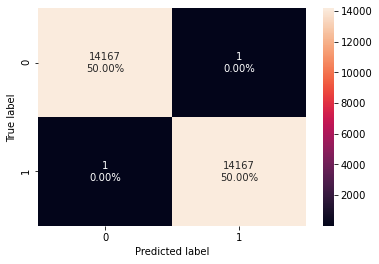

In [205]:
# confusion matrix for train data
confusion_matrix_sklearn(tuned_bag_gcv,X_train_over, y_train_over)

In [145]:
bag_gcv_val_perf = model_performance_classification_sklearn(tuned_bag_gcv,X_val, y_val)
bag_gcv_val_perf

,Accuracy,Recall,Precision,F1
0,0.986,0.867,0.883,0.875


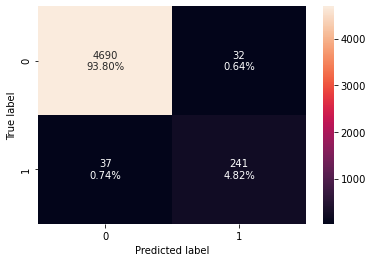

In [206]:
# confusion matrix for train data
confusion_matrix_sklearn(tuned_bag_gcv,X_val, y_val)

### Observation : 
* It is very clear the model is over fitting on the Train data. 
* The Recall score however is very low on the validation set.

### Random Forest classifier Grid search Cross validation

In [134]:
%%time 
# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1) 
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)
#Fitting parameters in RandomizedSearchCV
grid_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters are {'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 1, 'n_estimators': 200} with CV score=0.9818606498020482:
Wall time: 16min 16s


In [148]:
# creating Pipelines with best parameters

tuned_rf_gcv = RandomForestClassifier(random_state=1,
                                      max_features='sqrt',
                                      max_samples=0.6,
                                      min_samples_leaf=1,
                                      n_estimators=200
                                     )
tuned_rf_gcv.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=200,
                       random_state=1)

In [208]:
rf_gcv_train_perf = model_performance_classification_sklearn(tuned_rf_gcv,X_train_over, y_train_over)
rf_gcv_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


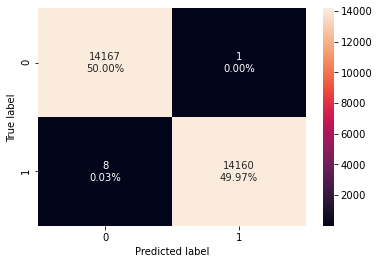

In [209]:
# confusion matrix for train data
confusion_matrix_sklearn(tuned_rf_gcv,X_train_over, y_train_over)

In [150]:
rf_gcv_val_perf = model_performance_classification_sklearn(tuned_rf_gcv,X_val, y_val)
rf_gcv_val_perf

,Accuracy,Recall,Precision,F1
0,0.988,0.863,0.920,0.891


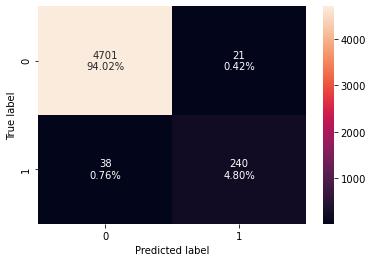

In [210]:
# confusion matrix for train data
confusion_matrix_sklearn(tuned_rf_gcv,X_val, y_val)

### Observation : 
* It is very clear the model is over fitting on the Train data. 
* The Recall score however is very low on the validation set.

### XG Boost Classifier Grid Search Cross Validation

In [135]:
%%time 

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 5, 'scale_pos_weight': 10, 'subsample': 0.8} with CV score=1.0:
Wall time: 10h 45min 39s


In [155]:
tuned_xgb_gcv = XGBClassifier(random_state=1,
                              eval_metric='logloss',
                              gamma=0, 
                              learning_rate=0.01, 
                              max_depth= 1,
                              n_estimators=50, 
                              reg_lambda=5, 
                              scale_pos_weight= 10, 
                              subsample=0.8
                             )
tuned_xgb_gcv.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=10, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [211]:
xgb_gcv_train_perf = model_performance_classification_sklearn(tuned_xgb_gcv,X_train_over, y_train_over)
xgb_gcv_train_perf

,Accuracy,Recall,Precision,F1
0,0.500,1.000,0.500,0.667


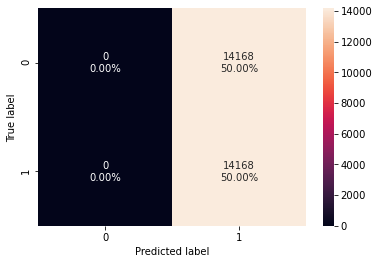

In [212]:
# confusion matrix for train data
confusion_matrix_sklearn(tuned_xgb_gcv,X_train_over, y_train_over)

In [158]:
xgb_gcv_val_perf = model_performance_classification_sklearn(tuned_xgb_gcv,X_val, y_val)
xgb_gcv_val_perf

,Accuracy,Recall,Precision,F1
0,0.056,1.000,0.056,0.105


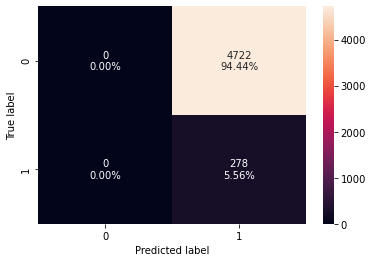

In [213]:
# confusion matrix for train data
confusion_matrix_sklearn(tuned_xgb_gcv,X_val, y_val)

### Observation:
* Both the models Recall score shows the models are overfitting.

## RandomizedSearchCV
### Performing Random search on Bagging calssifier , Random Forest classifier and XGboost classifier from the oversampled data

###  Bagging Classifier  Random Seacrh Cross Validation

In [118]:
%%time 
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_samples': [0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70], 
             }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.9828488269988673:
Wall time: 23min 32s


In [164]:
# creating Pipelines with best parameters

tuned_bag_rcv = BaggingClassifier( random_state=1,
                                  n_estimators=70,
                                  max_samples=0.9,
                                  max_features=0.8
                                 )
tuned_bag_rcv.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [214]:
bag_rcv_train_perf = model_performance_classification_sklearn(tuned_bag_rcv,X_train_over,y_train_over)
bag_rcv_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


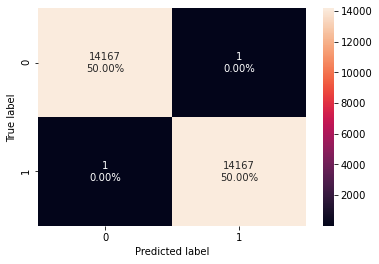

In [217]:
confusion_matrix_sklearn(tuned_bag_rcv,X_train_over,y_train_over)

In [215]:
bag_rcv_val_perf = model_performance_classification_sklearn(tuned_bag_rcv,X_val,y_val)
bag_rcv_val_perf

,Accuracy,Recall,Precision,F1
0,0.986,0.867,0.883,0.875


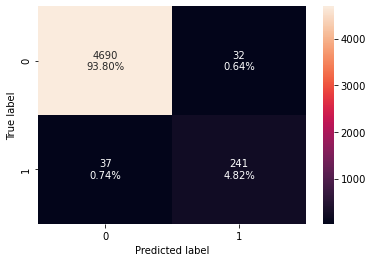

In [216]:
# confusion matrix for train data
confusion_matrix_sklearn(tuned_bag_rcv,X_val,y_val)

### Observation : 
* The model is overfitting on the Train data.
* The scores are generalized on the validation set.

###  Random Forest Classifier Random Seacrh Cross Validation

In [119]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [200,250,300], 
              "min_samples_leaf": np.arange(1, 4),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1)  
             }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9818606498020482:
Wall time: 15min 27s


In [168]:
tuned_rf_rcv = RandomForestClassifier(random_state=1,
                                      n_estimators= 200,
                                      min_samples_leaf= 1,
                                      max_samples= 0.6, 
                                      max_features= 'sqrt'
                                     )
tuned_rf_rcv.fit(X_train_over,y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=200,
                       random_state=1)

In [218]:
rf_rcv_train_perf = model_performance_classification_sklearn(tuned_rf_rcv,X_train_over,y_train_over)
rf_rcv_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


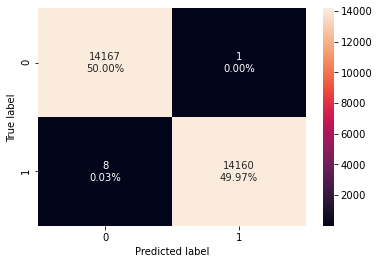

In [220]:
# confusion matrix for train data
confusion_matrix_sklearn(tuned_rf_rcv,X_train_over,y_train_over)

In [219]:
rf_rcv_val_perf = model_performance_classification_sklearn(tuned_rf_rcv,X_val,y_val)
rf_rcv_val_perf

,Accuracy,Recall,Precision,F1
0,0.988,0.863,0.920,0.891


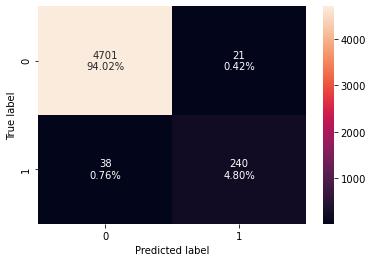

In [221]:
# confusion matrix for train data
confusion_matrix_sklearn(tuned_rf_rcv,X_val,y_val)

### Observation : 
* The model is overfitting on the Train data.
* The scores are generalized on the validation set.

### XG boost Classifier  Random Seacrh Cross Validation

In [120]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid = {'n_estimators': [150, 200, 250],
              'scale_pos_weight': [5,10], 
              'learning_rate': [0.1,0.2], 
              'gamma': [0,3,5],
              'subsample': [0.8,0.9]  
             }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.2, 'gamma': 0} with CV score=0.995765154155294:
Wall time: 1h 36min 57s


In [173]:
tuned_xgb_rcv = XGBClassifier(random_state=1,
                              eval_metric='logloss',
                              subsample= 0.8,
                              scale_pos_weight= 10, 
                              n_estimators=250, 
                              learning_rate=0.2, 
                              gamma=0)

tuned_xgb_rcv.fit(X_train_over,y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [222]:
xgb_rcv_train_perf = model_performance_classification_sklearn(tuned_xgb_rcv, X_train_over,y_train_over)
xgb_rcv_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


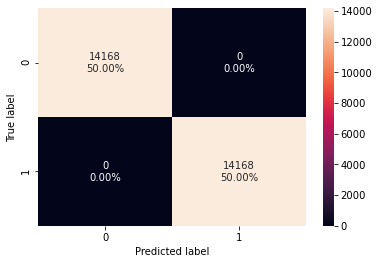

In [224]:
# confusion matrix for train data
confusion_matrix_sklearn(tuned_xgb_rcv, X_train_over,y_train_over)

In [223]:
xgb_rcv_val_perf = model_performance_classification_sklearn(tuned_xgb_rcv,X_val,y_val)
xgb_rcv_val_perf

,Accuracy,Recall,Precision,F1
0,0.986,0.878,0.878,0.878


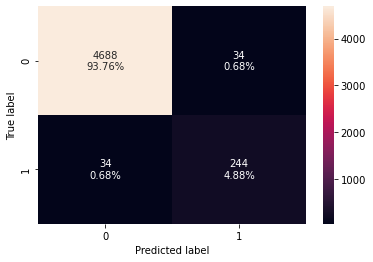

In [226]:
# confusion matrix for train data
confusion_matrix_sklearn(tuned_xgb_rcv,X_val,y_val)

### Observation : 
* The model is overfitting on the Train data.
* The scores are generalized on the validation set.

### Model performance comparison and choosing the final model

### Train set  model performance scores comparison

In [195]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        bag_gcv_train_perf.T,
        bag_rcv_train_perf.T,
        rf_gcv_train_perf.T,
        rf_rcv_train_perf.T,
        xgb_gcv_train_perf.T,
        xgb_rcv_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    'Bagging calssifier Grid search over Train sample data',
    'Bagging calssifier Random search over Train sample data',
    'Random Forest Classifier Grid search over Train sample data',
    'Random Forest Classifier Random search over Train sample data',
    'XG Boost Claasifier Grid search over Train sample data',
    'XG Boost Claasifier Random search over Train sample data',
    ]

print('training performance comparision:')
models_train_comp_df


training performance comparision:


,Bagging calssifier Grid search over Train sample data,Bagging calssifier Random search over Train sample data,Random Forest Classifier Grid search over Train sample data,Random Forest Classifier Random search over Train sample data,XG Boost Claasifier Grid search over Train sample data,XG Boost Claasifier Random search over Train sample data
Accuracy,1.000,1.000,1.000,1.000,0.500,1.000
Recall,1.000,1.000,0.999,0.999,1.000,1.000
Precision,1.000,1.000,1.000,1.000,0.500,1.000
F1,1.000,1.000,1.000,1.000,0.667,1.000


### Validationset model performance scores comparison

In [281]:
# validation performance comparison

models_val_comp_df = pd.concat([        
        bag_gcv_val_perf.T,
        bag_rcv_val_perf.T,
        rf_gcv_val_perf.T,
        rf_rcv_val_perf.T,
        xgb_gcv_val_perf.T,
        xgb_rcv_val_perf.T
    ],
    axis=1,
    )

models_val_comp_df.columns = [
    'Bagging calssifier Grid search val sample data',
    'Bagging calssifier Random search  val sample data',
    'Random Forest Classifier Grid search  val sample data',
    'Random Forest Classifier Random search val sample data',
    'XG Boost Classifier Grid search  sample val data',
    'XG Boost Classifier Random search  sample val data',
    ]

print('validation performance comparision:')
models_val_comp_df

validation performance comparision:


,Bagging calssifier Grid search val sample data,Bagging calssifier Random search val sample data,Random Forest Classifier Grid search val sample data,Random Forest Classifier Random search val sample data,XG Boost Classifier Grid search sample val data,XG Boost Classifier Random search sample val data
Accuracy,0.986,0.986,0.988,0.988,0.056,0.986
Recall,0.867,0.867,0.863,0.863,1.000,0.878
Precision,0.883,0.883,0.920,0.920,0.056,0.878
F1,0.875,0.875,0.891,0.891,0.105,0.878


### Observation : 
* The XG Boost Classifier Grid search with the highest Recall score of 1 followed by XG boost Classifier Random Search with a Recall score of 0.87 and  Random Forest Random search with a Recall score 0.86  performed well when compared to all the other models
* However, choosing the Random Forest Random search CV model to test the unseen test data as it gives good performance on over all the scores.

## Model Performance on the unseen Test Data
### Choosing Random Forest Random search  to test the final model on the unseen Test data

In [306]:
#Choosing XG boost Classifier Random Seacrh  for model perforance on the unseen test data 

rf_rcv_test = model_performance_classification_sklearn(tuned_rf_rcv,X_test,y_test)
rf_rcv_test

,Accuracy,Recall,Precision,F1
0,0.987,0.840,0.926,0.881


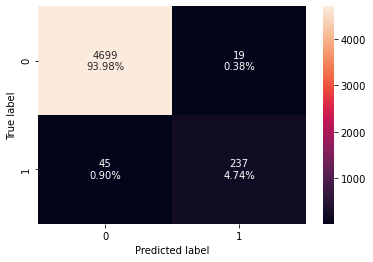

In [307]:
# confusion matrix for the unseen test data
confusion_matrix_sklearn(tuned_rf_rcv,X_test,y_test)

### Observation : 
* The scores are now generalized.
* Our scope was to reduce the False Negatives and a better Recall score. 
* The final model onthe unseen data shows the Recall score of 0.84

### Feature Importance as per the Final Model

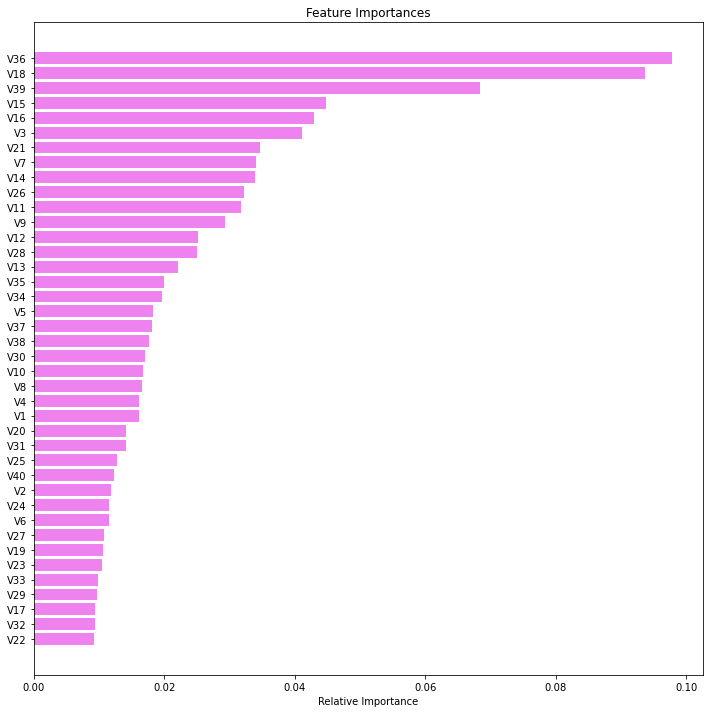

In [308]:
feature_names = X_train.columns
importances = tuned_rf_rcv.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


### Observation : 
* Columns  V36, V18 are the most important features followed by V39 and V15 as per the finalized model

## Pipelines to build the final model


- Since we have only one datatype in the data, we don't need to use column transformer here

In [309]:
Model = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy="median")),
        (
            "Tuned RF",
            RandomForestClassifier(random_state=1,
                                      n_estimators= 200,
                                      min_samples_leaf= 1,
                                      max_samples= 0.6, 
                                      max_features= 'sqrt'

            ),
        ),
    ]
)

In [310]:
# Separating target variable and other variables
X1 = d_train.drop(columns="Target")
Y1 = d_train["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

X_test1 = df_test.drop(["Target"],axis=1) 
y_test1 = df_test["Target"]

In [311]:
# missing value treatment in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# missing value treatment in the test set
X2 = imputer.transform(X_test1)

In [312]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

In [313]:
Model.fit(X_over1, y_over1)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Tuned RF',
                 RandomForestClassifier(max_features='sqrt', max_samples=0.6,
                                        n_estimators=200, random_state=1))])

In [315]:
final_model_test = model_performance_classification_sklearn(Model,X_test1, y_test1)
final_model_test

,Accuracy,Recall,Precision,F1
0,0.988,0.844,0.944,0.891


### Observations: 
* Our scope was to reduce the False Negatives and a better Recall score.
* The model performance on the unseen test data is generalized. 
* Also, the Recall score is 0.84


# Business Insights

* Objective of the data provided was to find a good model to predict the features provided and to find the right features that influence the Target Variable.
* A model to ensure that the maximum number of generator failures are predicted correctly by the model.
* To predict the failure patterns earlier so the components are  replaced before it fails. Replacing would reduce the costs of operation and maintenance will also be much lower.
* There were 2 data sets provided Train data and Test data.
* Most the model building was performed and Train data set to avoid any data leakage on the test data set.
* Both the data sets exhibited the same patterns of distribution.
* Both the data sets had missing values which were imputed by the median value.
* when, looked at the target variable specifically the 0 class which is Non failure falls in the majority class and 1 which is Failure falls in the minority class.There was an imbalance in the class and hence oversampling and undersampling was performed inorder to balance the class.
* Performance Metric  : Our metric of interest was to reduce the False Negatives, and to increase the Recall score.Greater the Recall, the higher the chances of minimizing false negatives.
* Models: There are totally 21 models  
   * 7 Models(Logistic regression,dtree,Bagging,Random forest,GBM,Adaboost and Xgboost) for  Original Data.
   * 7 Models(Logistic regression,dtree,Bagging,Random forest,GBM,Adaboost and Xgboost) for Oversampled data.
   * 7 Models(Logistic regression,dtree,Bagging,Random forest,GBM,Adaboost and Xgboost) for undersamples data.
* Among the 3 sample data sets , models with the oversampled data perfromed well with good scores.
* Hypertuning : 3 best models( Bagging classifier , Random classifier and XG boost Clasifier) on the over samples data performed really well and were chosen to perform Hypertuning Grid search and Random search.
* A total of 6 models .i.e. 
    * 3 best models ( Bagging classifier , Random classifier and XG boost Clasifier)against Grid search CV 
    * 3 best models( Bagging classifier , Random classifier and XG boost Clasifier)against Random search CV 
* Among the 6 models the XG Boost Classifier Grid search with the highest Recall score of 1 followed by XG boost Classifier Random Search with a Recall score of 0.87 and Random Forest Random search with a Recall score 0.86 performed well when compared to all the other models
* Random Forest Random search model was chosen as  the best as it showed generalized scores to test it against the Unseen Test Data.

### Recommendations & Conclusions
* As, the data was transformed and the columns were not named aginst the features to various parts of the wind turbine it is difficult to conclude which feature or part os very important according to the model.
* It is difficukt to understand or conclude if more additional features or parts were needed for better prediction.
* However, the person with the domain knowledge who can understand the feature/column names provided in the data set would be able to understand well.
* Random Forest Random search model CV perfomed well with a good Recall score on the test data to predict the indpendant variables and can be used for any new unseen data predictions.
* As, per the model features/Columns V36, V18 hold the highest importantance followed by V39 and V15.
* Hence can conclude that the final Random Forest Random search CV model can be used to predict the failure patterns earlier that way the parts can be repaired earlier before the parts or the machine breaks down.

***